In [5]:
#Installation des packages
install.packages("googledrive")
install.packages("readxl")
install.packages("ggplot2")
install.packages("reshape")
install.packages("urca")
install.packages("exuber")
install.packages("MultipleBubbles")
install.packages("urca")
install.packages("FinTS")
install.packages("forecast")
install.packages("reshape2")
install.packages("lmtest")
install.packages("moments")
install.packages("tseries")
install.packages("Metrics")
install.packages("tsm")
install.packages("vars")
install.packages("lpirfs")
install.packages("data.table")
install.packages("tsDyn")
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rngtools’, ‘iterators’, ‘snow’, ‘doRNG’, ‘doSNOW’, ‘foreach’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-lib

#$\color{red}{\text{Introduction}}$


Le terme de commodité est utilisé sur les marchés pour désigner l’ensemble des matières premières. On distingue deux groupes distincts : les hard commodities qui regroupent l’ensemble des ressources naturelles telles que les minerais ou encore le pétrole, et les soft commodities qui sont des produits devant être cultivés et entretenus, notamment les produits agricoles. Cette classe d’actif se caractérise par une volatilité élevée en raison d’une dépendance à plusieurs facteurs - géopolitiques et climatiques, le prix des matières premières concurrentes ou encore le coût de l’énergie. Le déclenchement de la guerre en Ukraine, et les différentes catastrophes naturelles connues en 2022, ont contribué à l’envolée des cours, permettant aux grands négociants internationaux de réaliser des profits records : Cargil réalise ainsi près de 6,7 Mds $ de profit en 2022.

$\:$

$\color{red}{\text{Choix des données}}$

$\:$

« There’s no free lunch in finance » : cette citation résume l’idée selon laquelle il est impossible de réaliser un profit sans risque sur les marchés. Autrement dit, il n’existe aucun arbitrage permettant aux entreprises de réaliser un profit positif quel que soit l’évolution du marché et à l’équilibre, le rendement excédentaire est nul (CAPM). Pourtant, empiriquement, on observe sur les marchés actions la mise en œuvre de stratégies qui permettent de générer un rendement excédentaire, à l’image du pair trading. Pour comprendre son fonctionnement, il faut repartir du concept de loi du prix unique en économie. Il stipule que lorsque les marchés sont efficients, des biens identiques vendus à des endroits différents doivent avoir le même prix, exprimé dans la même devise. Ces actifs doivent donc converger vers le même niveau sur le long terme. Or, on sait qu'il existe des anomalies de marché. Il peut arriver que des valeurs soient sur ou sous-évaluées. La stratégie de pair trading consiste ainsi à identifier une paire de biens identiques et, en cas d’écartement de leurs spreads, à prendre une position short sur celui qui est surévalué et long sur l’autre. À mesure que les prix convergent vers leur moyenne de long terme (phénomène de mean reversion), un profit sans risque est réalisé. On peut se demander dans quelle mesure est-il possible de mettre en œuvre cette stratégie sur le marché des commodities pour réaliser un profit sans risque ?

$\:$

La mise en œuvre du pair trading nécessite de sélectionner des produits suffisamment substituables pour pouvoir construire des paires. C’est pourquoi on utilise des données  portant sur les prix de trois matières premières agricoles : le riz, le blé et le maïs. Ces données sont mensuelles, proviennent toutes les trois du site indexmundi et sont issues de la base de données de la World Bank. À travers ce projet, nous allons chercher à établir l’existence d’une relation entre ces différentes variables afin de montrer si oui ou non l’évolution de l’une d’entre elles a un impact direct sur les autres. Dans le cadre de notre étude, nous nous concentrerons sur les séries portant sur le riz et le blé.

#$\color{red}{\text{Partie 1 : Modélisation univariée}}$

Dans cette première partie, nous cherchons à étudier les séries individuellement afin de représenter leur dynamique. La modélisation des processus se fera à partir d'études graphiques ainsi que de tests de validation statistiques.


$\color{red}{\text{Récupération des données :}}$

On importe la base de données et l'on vérifie qu'il n'y ait pas de données manquantes.

In [6]:
library(googledrive)
drive_download("https://docs.google.com/spreadsheets/d/14SYPpzVv37pZ8B85BTwBm-9ulDgCYFpu/edit?usp=drive_web&ouid=109942115429299523309&rtpof=true")

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=e1125884e53bdec87e7d6a7e9c5453bc&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbXZjQnZaMzRZTUljbi1LRE9vc3hBMlpEeXRpb2FWdzE3Mi1MS0xBY2VRUC1YV1pudHcxVHVTY19LZjhubl9nZyIsInN0YXRlIjoiZTExMjU4ODRlNTNiZGVjODdlN2Q2YTdlOWM1NDUzYmMifQ==


File downloaded:

• econometriedata.xlsx <id: 14SYPpzVv37pZ8B85BTwBm-9ulDgCYFpu>

Saved locally as:

• econometriedata.xlsx



In [7]:
library(readxl)
Base <- read_excel("econometriedata.xlsx")
Base <- as.data.frame(Base)
str(Base)
colnames(Base) <- c("dates", "riz", "blé", "mais")
sapply(Base, function(x) sum(is.na(x)))


'data.frame':	361 obs. of  4 variables:
 $ Monthe     : POSIXct, format: "1993-09-01" "1993-10-01" ...
 $ Riz Price  : num  206 257 308 320 356 ...
 $ Wheat price: num  131 136 147 159 153 ...
 $ Corn price : num  101 107 117 122 127 ...


dates   riz   blé  mais 
    0     0     0     0

On crée 3 trois dataframes :
- un dataframe contenant les dates et les données du riz
- un dataframe contenant les dates et les données du blé
- un dataframe contenant  les dates et les données du maïs

In [8]:
df_riz <- Base[, c("dates", "riz")]
df_ble <- Base[, c("dates", "blé")]
df_mais <- Base[, c("dates", "mais")]

#$\color{red}{\text{I) Représentation graphique}}$

Dans le cadre de notre étude, la première analyse que nous faisons est une analyse graphique afin d’étudier l’évolution de nos séries ainsi que leurs propriétés. On a ainsi :



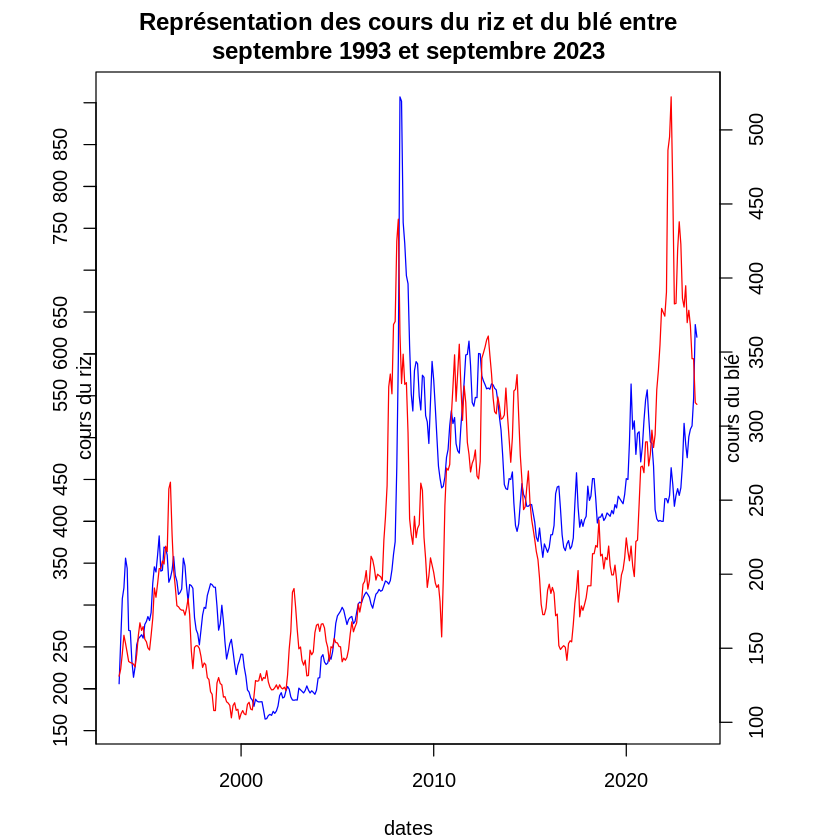

In [9]:
library(ggplot2)
plot.new()
par(mar=c(4,4,3,5))
plot(df_riz, type="l", main="Représentation des cours du riz et du blé entre
septembre 1993 et septembre 2023",
sub="Données mensuelles, en logarithme, entre janvier 1993 et septembre 2023",
ylab="",col="blue")
axis(2,at=seq(100,900,by=50))
mtext("cours du riz", side=2)
par(new=T)
plot(df_ble, type="l",axes=F,xlab="",ylab="",col="red")
axis(4,at=seq(100, 900, by=50))
mtext("cours du blé", side=4)


Sur la base de cette représentation, on observe que nos séries ont tendance à évoluer dans le même sens. On peut ainsi penser qu'elles sont cointégrées, ce qui est un prérequis pour la mise en œuvre d’une stratégie de pair trading. Par ailleurs, il y a des variations importantes des prix à plusieurs périodes, notamment en 2008 avec un cours du riz multiplié par près de 3 en quelques mois, ou à partir des années 2020 pour les cours du blé.

Puisque nous travaillons sur des données financières, nous allons essayer de voir si ces fortes hausses peuvent s’apparenter à des bulles spéculatives.


##$\color{red}{\text{test de la présence d'une bulle}}$

Afin d’identifier la présence d’une bulle spéculative, nous allons mettre en œuvre un test qui porte sur la tendance des prix. Une bulle sera détectée lorsque cette tendance sera dite « explosive ». On a :

$\:$

 **$\underline{Hypothèses}$** :  $\left\{\begin{array}{c}H_0:ϕ_1 = 1\\H_1:ϕ_1>1\end{array}\right.$

 $\:$

**$\underline{Statistique \: de \: test}$** : $SADF(r_0) = sup_{rϵ[0,1]}t_{ADF,r}$

$\:$

**$\underline{\text{Règle de décision}}$** : Rejet de $H_0$ au seuil $\alpha$ si SADF($r_0$) > VC où VC est un quantile d'ordre 1 - $\alpha$ calculé via des simulations de Monte Carlo.

$\:$

Ce test est effectué sur des plages récursives. Il est différent du test sur période globale qui calcule une seule statistique de test $t_{ADF} = \frac{\hat{ρ}-1}{\hat{σ}_{\hat{\rho}}}$ qui suit une loi de Dickey Fuller.

Préalablement à la mise en oeuvre de ce test, on doit considérer le nombre de retards à utiliser dans le test de bulle. Pour cela, on réalise un test ADF :

In [10]:
library(urca)
adf_riz <- ur.df(y=df_riz$riz, type=c("trend") ,lag=10, selectlags=c("AIC"))
summary(adf_riz)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.576 -10.491  -1.962   8.367 284.872 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.27759    4.25968   2.178  0.03008 *  
z.lag.1     -0.03808    0.01339  -2.845  0.00471 ** 
tt           0.03211    0.01706   1.882  0.06065 .  
z.diff.lag1  0.39813    0.05247   7.588 3.05e-13 ***
z.diff.lag2 -0.17504    0.05395  -3.245  0.00129 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.69 on 345 degrees of freedom
Multiple R-squared:  0.1588,	Adjusted R-squared:  0.1491 
F-statistic: 16.29 on 4 and 345 DF,  p-value: 3.129e-12


Value of test-statistic is: -2.8448 2.8364 4.0675 

Critical values for test statistics: 
      1pc

In [11]:
adf_ble <- ur.df(y=df_ble$`blé`, type=c("trend") ,lag=10, selectlags=c("AIC"))
summary(adf_ble)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-60.039  -8.189  -1.567   7.321  94.660 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.47543    2.49826   2.192  0.02908 *  
z.lag.1     -0.04218    0.01402  -3.009  0.00282 ** 
tt           0.02157    0.01098   1.964  0.05031 .  
z.diff.lag1  0.26562    0.05334   4.980 1.01e-06 ***
z.diff.lag2 -0.07665    0.05530  -1.386  0.16662    
z.diff.lag3  0.01633    0.05537   0.295  0.76824    
z.diff.lag4 -0.03565    0.05543  -0.643  0.52057    
z.diff.lag5  0.11743    0.05546   2.117  0.03496 *  
z.diff.lag6  0.14091    0.05541   2.543  0.01143 *  
z.diff.lag7 -0.08846    0.05478  -1.615  0.10731    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residua

In [12]:
adf_mais <- ur.df(y=df_mais$mais, type=c("trend") ,lag=10, selectlags=c("AIC"))
summary(adf_mais)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.254  -4.723  -0.575   4.632  69.705 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.490346   1.660908   2.101  0.03633 *  
z.lag.1     -0.036685   0.012079  -3.037  0.00257 ** 
tt           0.015632   0.008199   1.906  0.05742 .  
z.diff.lag1  0.259961   0.053383   4.870 1.71e-06 ***
z.diff.lag2 -0.013894   0.055786  -0.249  0.80347    
z.diff.lag3  0.109865   0.054598   2.012  0.04497 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 11.72 on 344 degrees of freedom
Multiple R-squared:  0.09085,	Adjusted R-squared:  0.07764 
F-statistic: 6.875 on 5 and 344 DF,  p-value: 3.926e-06


Value of test-statistic is: -3.0371 3

**$\underline{\text{Conclusion de ces tests}}$**

Les conclusions du test ADF sur le nombre de retards à retenir pour le test de bulles sur chacune de nos séries sont :    
- Série des cours du riz : le critère AIC préconise 2 retards
- Série des cours du blé : le critère AIC préconise 7 retards
- Série des cours du maïs : le critère AIC préconise 3 retards

Nous allons donc réaliser nos tests de bulles avec respectivement 2, 7 et 3 retards. Néanmoins, l'une des limites que l'on peut pointer est que si l'on sélectionne plus de 1 retards, il est possible que le risque de première espèce du test ne soit plus contrôlé.


In [13]:
#install.packages("exuber")
library(exuber)
psy_minw(df_riz$riz)
radf_riz <-radf(df_riz$riz,lag=2)
sprintf("La statistique du test SADF est %f",radf_riz$sadf)
radf_crit$n37$sadf_cv
print(diagnostics(radf_riz,option = "sadf"))

[1] 37

[1] "La statistique du test SADF est 2.109899"

90%      95%      99% 
0.818699 1.139014 1.814626

Using `radf_crit` for `cv`.




── Diagnostics (option = sadf) ────────────────────────────────── Monte Carlo ──

series1:  Rejects H0 at the 1% significance level



La statistique du test SADF pour notre série des prix du riz est $SADF_
{riz} = 2,11$ > 1,14% qui correspond au quantile calculé par la Méthode de Monte Carlo pour un risque de première espèce de 5%. On rejette donc l'hypothèse nulle et on conclut qu'il y'a une bulle spéculative.

Graphiquement, on peut supposer que cette bulle correspond à la crise de 2008. En effet, à cette période il y'a eu des investissements très importants sur les *commodities* qui étaient considérés comme des actifs refuges pour les investisseurs afin de couvrir les pertes engendrées sur les marchés actions au moment de la crise des subprimes.

In [14]:
sprintf("La longueur minimale d'une bulle est %f",psy_ds(df_riz$riz))
date_bulle_riz <- datestamp(radf_riz, min_duration = psy_ds(df_riz$riz), option="sadf" )
date_bulle_riz

[1] "La longueur minimale d'une bulle est 6.000000"

Using `radf_crit` for `cv`.

Warning message:
“Argument 'min_duration' excludes all explosive periods”


Suite à une erreur, on ne réalise pas de graphique portant sur l'identification des bulles, on supposera que la période détectée correspond au pic rencontré en 2008. Nous avons rencontré ce problème pour les trois séries.

In [15]:
psy_minw(df_ble$`blé`)
radf_ble <-radf(df_ble$`blé`,lag=7)
sprintf("La statistique du test SADF est %f",radf_ble$sadf)
radf_crit$n37$sadf_cv
print(diagnostics(radf_ble,option = "sadf"))

[1] 37

[1] "La statistique du test SADF est 1.512939"

90%      95%      99% 
0.818699 1.139014 1.814626

Using `radf_crit` for `cv`.




── Diagnostics (option = sadf) ────────────────────────────────── Monte Carlo ──

series1:  Rejects H0 at the 5% significance level



La statistique du test SADF pour la série du blé est $SADF_{ble} = 1,51 > 1,14$ donc on rejette l'hypothèse nulle au seuil de 5% et on conclut qu'il y'a également une bulle spéculative sur cette série. On peut penser que la période de bulle est la même que celle des prix du riz. En revanche, il est à noter que le test ADF a préconisé un nombre de retards élevés (7), il est donc probable que la statistique SADF soit en partie biaisée.

In [19]:
psy_minw(df_mais$mais)
radf_mais <-radf(df_mais$mais,lag=3)
sprintf("La statistique du test SADF est %f",radf_mais$sadf)
radf_crit$n37$sadf_cv
print(diagnostics(radf_mais,option = "sadf"))

[1] 37

[1] "La statistique du test SADF est 0.274818"

90%      95%      99% 
0.818699 1.139014 1.814626

Using `radf_crit` for `cv`.




── Diagnostics (option = sadf) ────────────────────────────────── Monte Carlo ──

series1:  Cannot reject H0 



La statistique de test sur la série du maïs est $SADF_{mais} = 0,27 < 1,
14$ donc on ne rejette pas l'hypothèse nulle d'absence de dynamique explosive des prix. Ce résultat est assez surprenant dans la mesure où les prix connaissent des mouvements d'amplitude similaire à ceux du riz et du blé. Par ailleurs, ce résultat peut s'expliquer par le nombre de retards choisit :

In [21]:
psy_minw(df_mais$mais)
radf_mais <-radf(df_mais$mais,lag=1)
sprintf("La statistique du test SADF est %f",radf_mais$sadf)
radf_crit$n37$sadf_cv
print(diagnostics(radf_mais,option = "sadf"))

[1] 37

[1] "La statistique du test SADF est 1.201195"

90%      95%      99% 
0.818699 1.139014 1.814626

Using `radf_crit` for `cv`.




── Diagnostics (option = sadf) ────────────────────────────────── Monte Carlo ──

series1:  Rejects H0 at the 10% significance level



En prenant un unique retard, et donc en garantissant une meilleure maîtrise du risque de première espèce, on rejette l'hypothèse nulle d'absence de dynamique explosive pour un seuil de $\alpha=5$%. La statistique du test est alors $SADF_{riz}=1,20 > 1,14$.

**$\underline{\text{Conclusion}}$** :

Les tests de bulle rejettent l'hypothèse d'absence de dynamique explosive des prix pour chacune de nos séries pour des risques de première espèce de :    
- 1% pour les cours du riz
- 5% pour les cours du blé
- 5% pour les cours du maïs, en sélectionnant un seul retard (rejet sinon)

En l'absence de graphique, on suppose que cette bulle provient de la période de 2008. Néanmoins, ce test vérifie l'existence d'une bulle spéculative. Or, ce qui se passe sur le marché des *commodities* n'est pas à proprement parler un phénomène de bulle spéculative, c'est un déplacement de la demande d'actions et d'obligations vers les contrats futures portant sur les matières premières. On peut donc émettre une réserve sur le fait qu'il y'ait vraiment un phénomène de bulle en 2008 sur nos séries, même si statistiquement la période est considérée comme telle.


##$\color{red}{\text{Etude des séries en logarithme}}$

Pour la suite de notre projet, nous utilisons des données en logarithme afin de donner plus d’importance aux petites variations.  Graphiquement, on obtient les séries suivantes

In [22]:
df_riz_log <- data.frame(df_riz$dates,log(data.frame(df_riz$riz)))
df_ble_log <- data.frame(df_ble$dates,log(data.frame(df_ble$`blé`)))
df_mais_log <- data.frame(df_mais$dates,log(data.frame(df_mais$mais)))

colnames(df_riz_log)<-c("dates","riz")
colnames(df_ble_log)<-c("dates","ble")
colnames(df_mais_log)<-c("dates","mais")


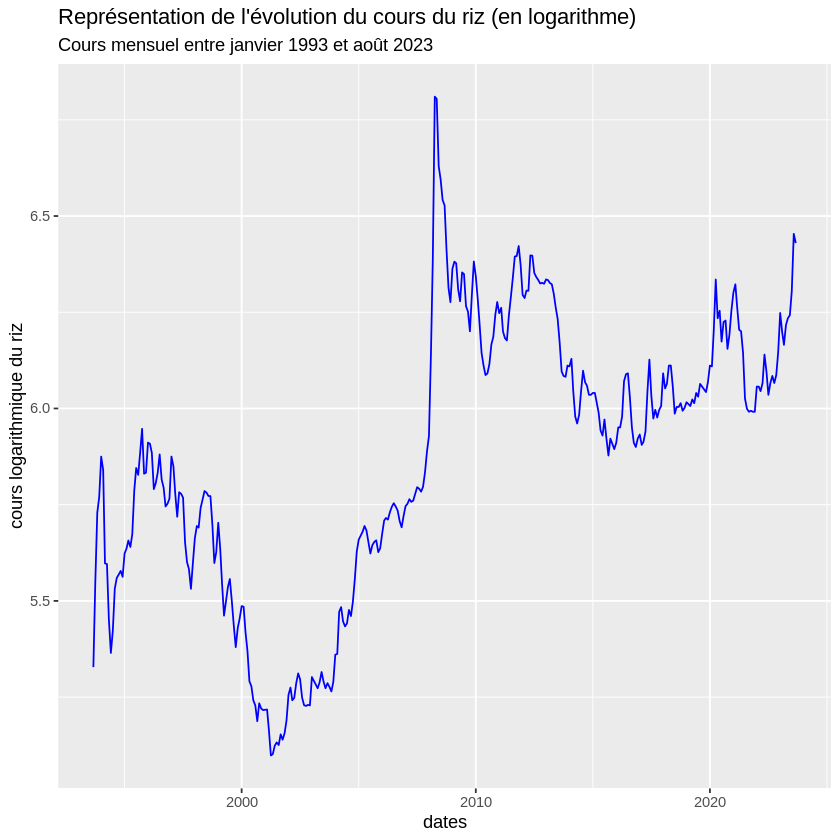

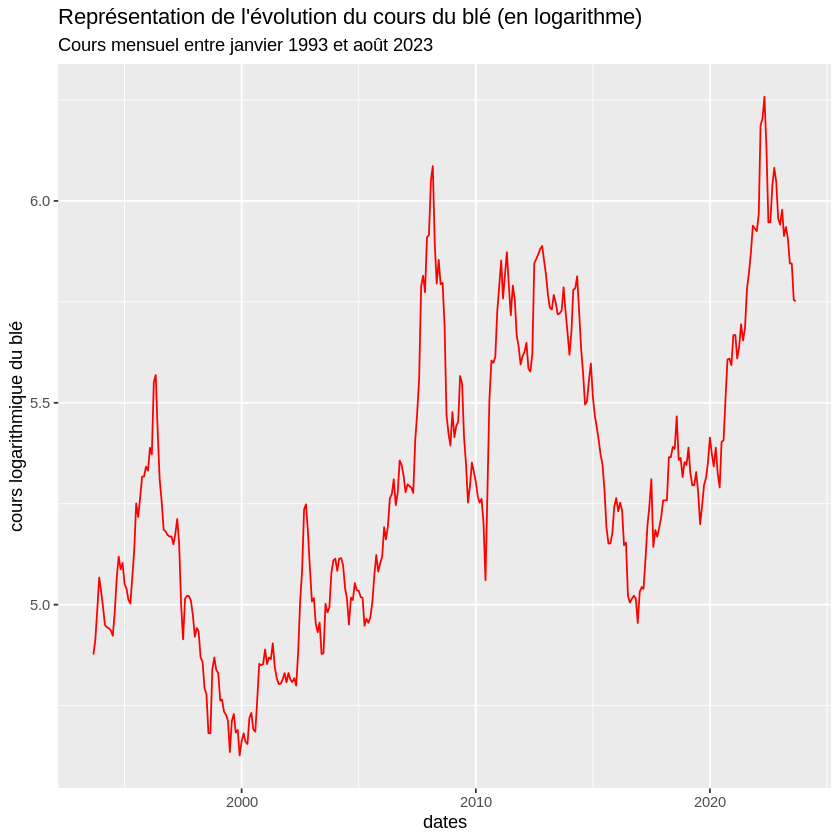

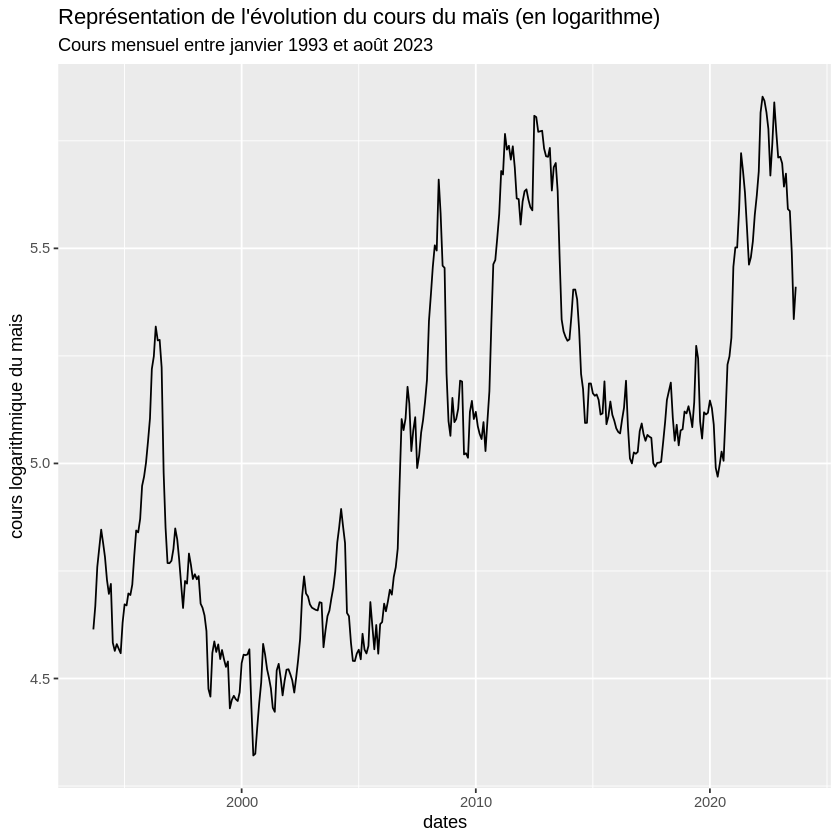

In [23]:
library(ggplot2)

prix_riz <- ggplot(data=df_riz_log, aes(x=dates, y=riz))+geom_line(color='blue')+
  xlab("dates")+ylab("cours logarithmique du riz")+labs(title =
  "Représentation de l'évolution du cours du riz (en logarithme)", subtitle="Cours mensuel entre janvier 1993 et août 2023")
prix_riz

prix_ble <- ggplot(data=df_ble_log, aes(x=dates, y=ble))+geom_line(color='red')+
  xlab("dates")+ylab("cours logarithmique du blé")+labs(title ="Représentation de l'évolution du cours du blé (en logarithme)", subtitle="Cours mensuel entre janvier 1993 et août 2023")
prix_ble

prix_mais <- ggplot(data=df_mais_log, aes(x=dates, y=mais))+geom_line(color='black')+
  xlab("dates")+ylab("cours logarithmique du mais")+labs(title ="Représentation de l'évolution du cours du maïs (en logarithme)", subtitle="Cours mensuel entre janvier 1993 et août 2023")
prix_mais


**$\underline{\text{Analyse graphique de la série des prix du riz}}:$**

On distingue plusieurs phases sur ce graphique. La première, qui va de 1993 à 2000, est marquée par un niveau du cours du riz en logarithme plus faible que sur le reste de notre échantillon. Cela correspond à une phase de libéralisation du commerce international, fin de l’Uruguay round en 1994, qui se traduit par une forte hausse des volumes échangés sur les marchés mondiaux. A partir de 2000, les cours du riz en logarithme sont structurellement plus élevés avec des pics enregistrés en 2008 et 2023. Celui de 2008 correspond aux « émeutes de la faim », un épisode de flambée des cours provoqué par les investisseurs. L’augmentation de 2023 peut être expliquée par les restrictions aux exportations décidées en Inde du fait de mauvaises récoltes (phénomène El Nino). Cette analyse graphique nous laisse penser que notre série n’est pas constante dans le temps. Elle ne semble pas non plus suivre une tendance particulière : on observe une alternance entre de nombreuses phases de hausse et de baisse. On peut donc supposer qu’elle n’est pas stationnaire.

**$\underline{\text{Analyse graphique de la série des prix du blé}}:$**

On distingue des phases similaires au graphique précédent. On remarque en effet une hausse soutenue du prix du blé entre 2002 et 2008, semblale à celle du riz. Plus particulièrement, l'année 2007 connaît de mauvaises conditions climatiques pour la production de blé, engendrant ainsi une baisse de la production et donc de l'offre alors que la quantité demandée était en hausse. Cette distortion entre l'offre et la demande a causé une envolée du prix du blé. Par opposition, les conditions climatiques sont très favorables en 2008 et inversent le rapport entre l'offre et la demande, ramennant le cours à celui de début 2007. L'histoire se répète en 2012, la sécheresse que connaissent les Etats-Unis ainsi que la Russie engendrent une flambée du prix du blé, à un niveau proche de celui de 2008, une nouvelle correction s'ensuit jusqu'en 2020. La crise de 2020 mène de nouveau à une hausse du prix, corrigé des 2022.

Les commentaires pour la série du mais sont similaires, avec des périodes de pic observées en 1994, 2008, 2012 et 2021.



Cette analyse graphique nous a permis de déterminer que nos séries ne sont à priori pas stationnaires. En outre, on constate qu’elles ne reviennent pas à leur niveau d’origine : les cours sont structurellement plus élevés sur la deuxième moitié de l’échantillon. On peut donc penser qu'elles sont modélisées par un processus UR. Pour le confirmer, on étudie les autocorrélogrammes.

#$\color{red}{\text{II) Autocorrélogramme simple et partiel des séries}}$

On analyse les autocorrélogrammes simples et partiels des prix mensuels du riz, du blé et du maïs en logarithme, avec un nombre maximum de retards de 25. On obtient les résultats suivants :



##$\color{red}{\text{1) Autocorrélogramme du riz}}$


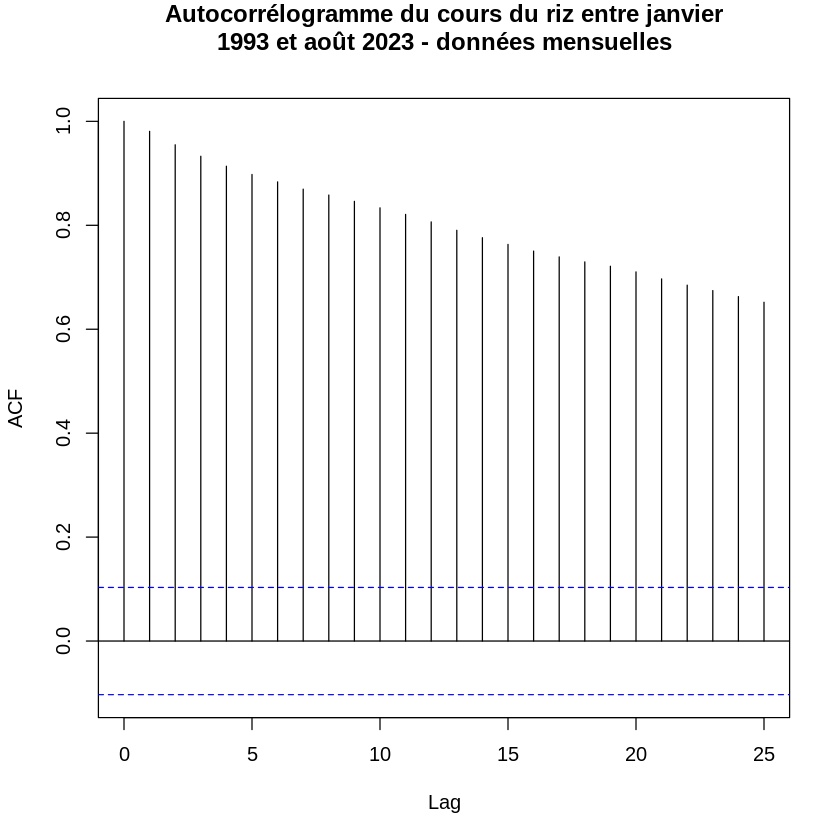

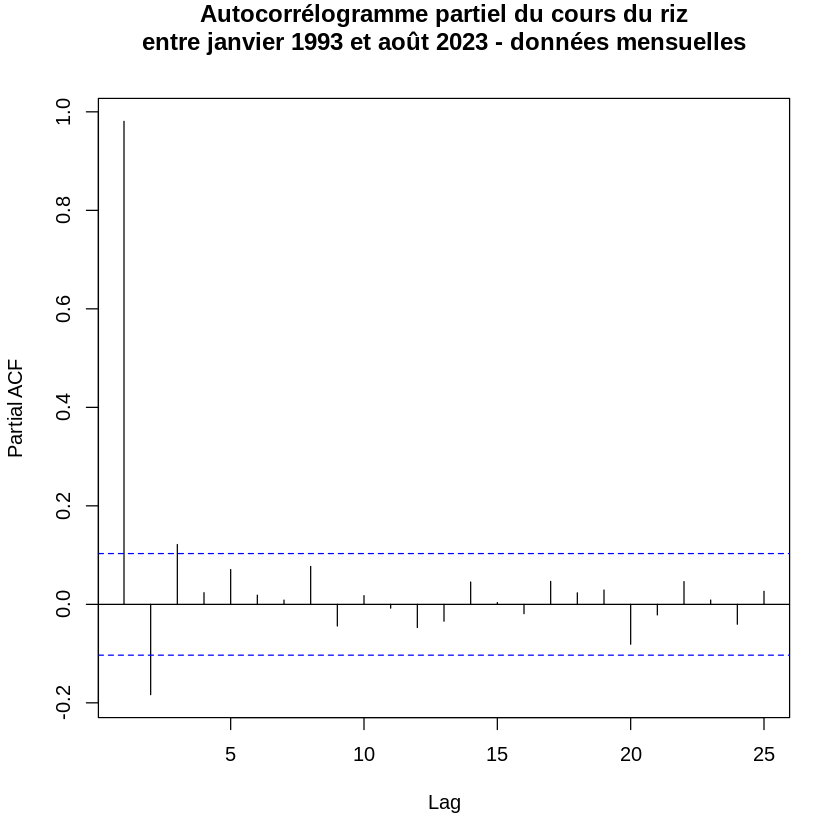

In [24]:
acf_riz<-acf(df_riz_log$riz, main="Autocorrélogramme du cours du riz entre janvier
1993 et août 2023 - données mensuelles")
pacf_riz <- pacf(df_riz_log$riz, main = "Autocorrélogramme partiel du cours du riz
entre janvier 1993 et août 2023 - données mensuelles")

On observe que nos autoccorélations décroissent lentement à partir du premier retard. L'ensemble de nos autocorrélations sont significatives jusqu'à l'ordre 25 et la première est très proche de 1. Cela impliquerait qu'un choc qui s'est produit sur le marché du riz il y'a 25 mois, soit environ 2 ans, continue d'affecter les cours d'aujourd'hui. Autrement dit, l'effet d'un choc sur notre série se révélerait permanent, ce qui conforte l’hypothèse d’une modélisation UR. Par ailleurs, compte tenue de l'évolution des autocorrélations, il est probable que notre série ne soit pas stationnaire, ce qui est en phase avec l’hypothèse d’efficience des marchés selon laquelle la meilleure estimation des cours de demain correspond aux cours d’aujourd’hui. Les autocorrélations partielles sont significatives seulement jusqu'à l'ordre 2. On peut conclure de cette analyse que notre série présente les caractéristiques d'un processus autorégressif d'ordre 2.

Pour ce qui est des prix du blé, on a :

##$\color{red}{\text{2) Autocorrélogramme du blé}}$

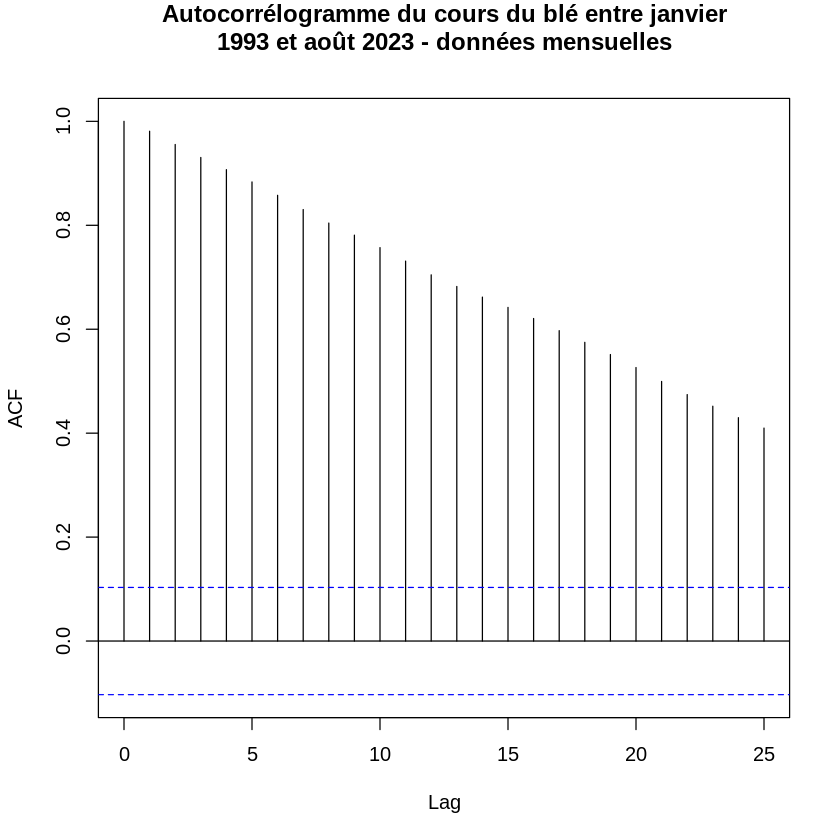

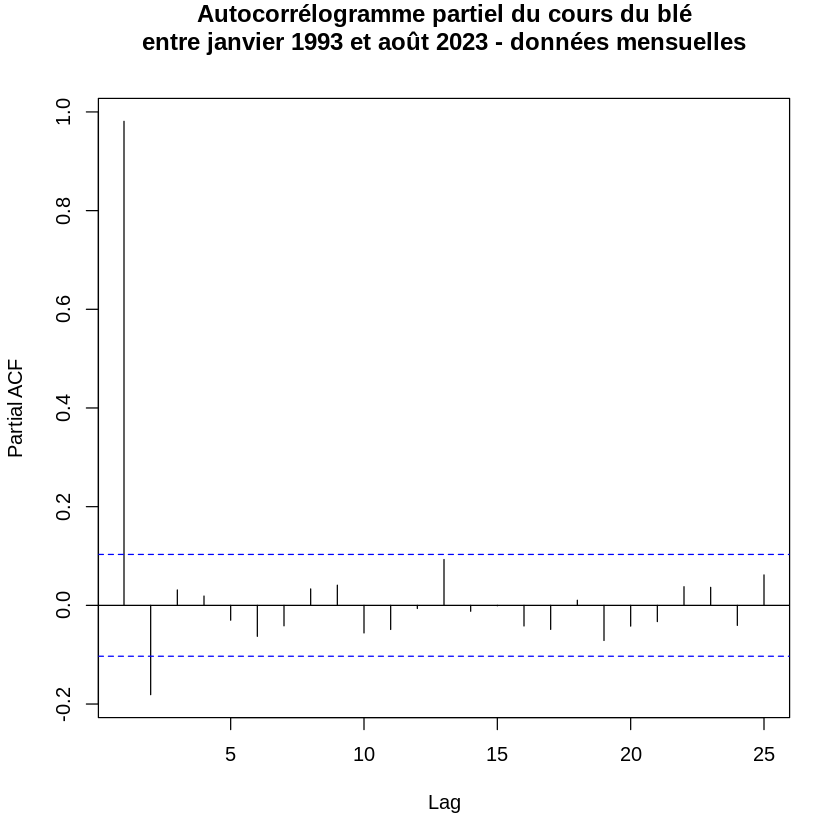

In [25]:
acf_ble<-acf(df_ble_log$ble, main="Autocorrélogramme du cours du blé entre janvier
1993 et août 2023 - données mensuelles")
pacf_ble <- pacf(df_ble_log$ble, main = "Autocorrélogramme partiel du cours du blé
entre janvier 1993 et août 2023 - données mensuelles")

Les autocorrélogrammes simples et partiels des prix du blé, en logarithme, sont semblables à ceux que nous avions dans le cas des prix du riz. Là encore, les autocorrélations décroissent lentement et la première semble très proche de 1, ce qui nous laisse penser que l'effet d'un choc sur le prix du blé est persistant et que notre série n'est pas stationnaire. Seules les deux premières autocorrélations partielles sont significatives donc on peut conclure que notre modèle est sans doute également modélisé par un processus autoregressif d'ordre 2.

##$\color{red}{\text{3) Autocorrélogramme du maïs}}$

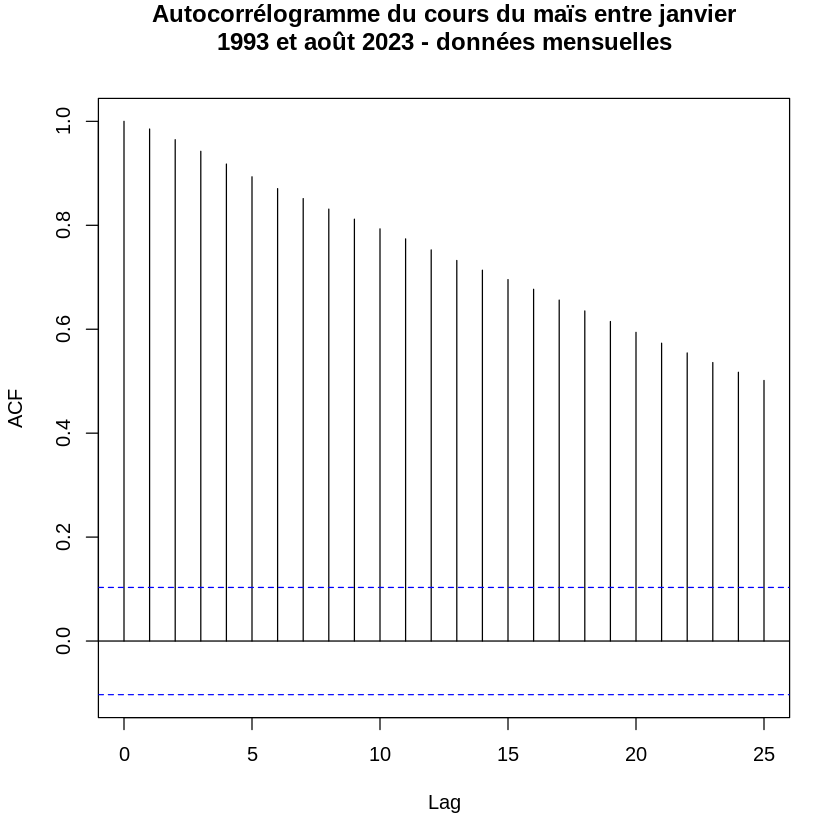

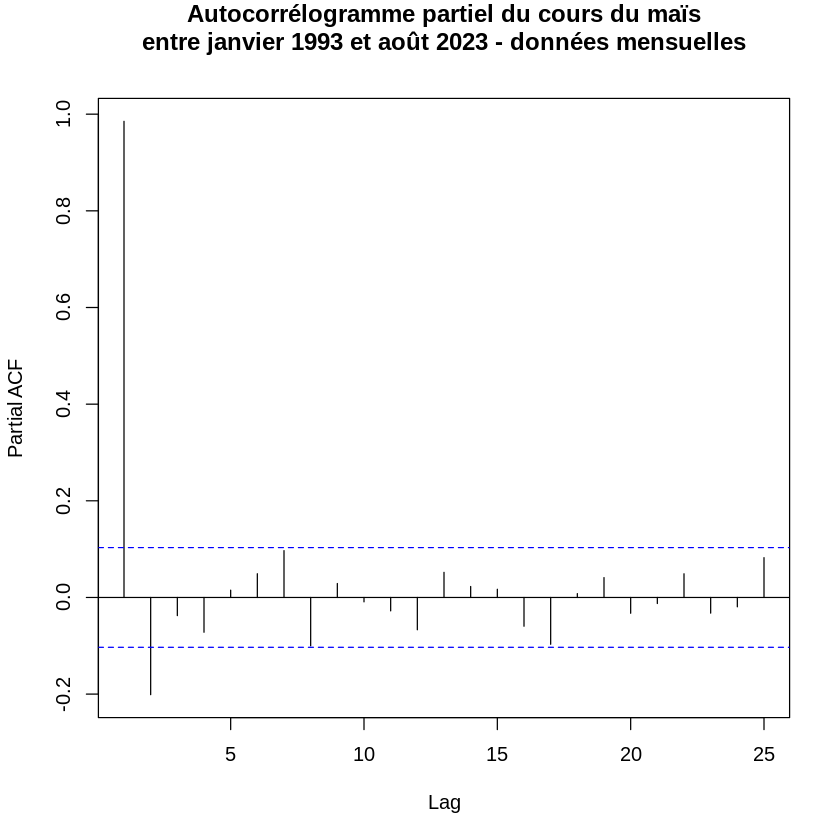

In [26]:
acf_maïs<-acf(df_mais_log$mais, main="Autocorrélogramme du cours du maïs entre janvier
1993 et août 2023 - données mensuelles")
pacf_maïs <- pacf(df_mais_log$mais, main = "Autocorrélogramme partiel du cours du maïs
entre janvier 1993 et août 2023 - données mensuelles")

Les conclusions pour le mais sont identiques à ce qu'on observe sur le blé et le riz. Nos 3 séries se ressemblent beaucoup du point de vu des autocorrélogrammes, même si les autocorrélations semblent plus persistantes dans le cas du riz que du blé et du maïs.

**$\underline{\text{Conclusion de notre analyse graphique}}$** :

La représentation des prix du riz, du blé et du maïs, en logarithme, ainsi que l'étude de leurs autocorrélations simples et partielles, nous permettent de tirer plusieurs conclusions préliminaires. Nos séries ne semblent pas stationnaires : on observe une forte volatilité dans le temps qui est typique des séries financières, et à fortiori des commodities. Cette hypothèse est confortée par la valeur très élevée de la première autocorrélation de nos deux séries. En outre, les autocorrélations partielles indiquent que notre procéssus est probablement autorégressif d'ordre 2.



#$\color{red}{\text{III) Stratégie de test séquentielle}}$

On réalise le test de Dickey-Fuller augmenté (ADF) sur nos séries afin de déterminer la modélisation appropriée, à savoir soit un modèle avec racine unitaire (UR) soit un modèle avec une tendance déterministe (TS). Compte tenu de l'étude graphique et des autocorrélogrammes, nous supposons qu’elles sont modélisées par un modèle UR. La mise en œuvre de tests statistiques va nous permettre de vérifier cette supposition. Le test ADF se présente de la manière suivante :


**$\underline{\text{Hypothèses}}$** :  $\left\{\begin{array}{c}H_0:\rho = 0=>x_t \: stationnaire\\H_1:\rho<0=>x_t \: non \: stationnaire\end{array}\right.$

$\:$

Il est nécessaire d'estimer les paramètres de la régression de Dickey-Fuller par les MCO.

$\:$

**$\underline{\text{Statistique de test}}$** : $t_\hat{\rho} = \frac{\hat{\rho}}{\hat{\sigma}_\hat{\rho}} = \frac{\hat{ϕ_1} - 1}{\hat{\sigma}_{\hat{ϕ_1}}}$

$\:$

**$\underline{\text{Règle de décision}}$** : Rejet de $H_0$ au seuil $\alpha$ si t* < $C_\alpha$ avec $C_\alpha$ le quantile d'ordre $\alpha$ de la table de Dickey Fuller.

$\:$

Ce test est mis en œuvre sur différents modèles successivement afin de détecter à la fois la présence d’une racine unitaire mais également la significativité des composantes déterministes de nos séries. Les trois modèles considérés sont les suivants : :

- $\underline{\text{un modèle avec tendance et constante}}$ (M3) :

    $\Delta x_t = c + bt + \rho x_{t-1} + \Sigma^p_{j-1}\gamma_j\Delta x_{t-j} + ϵ_t$

- $\underline{\text{un modèle avec constante}}$ (M2) :

    $\Delta x_t = c + \rho x_{t-1} + \Sigma^p_{j-1}\gamma_j\Delta x_{t-j} + ϵ_t$

- $\underline{\text{un modèle sans constante}}$ (M1) :

    $\Delta x_t = \rho x_{t-1} + \Sigma^p_{j-1}\gamma_j\Delta x_{t-j} + ϵ_t$



##$\color{red}{\text{1) Stratégie de test séquentielle - série des prix du riz en logarithme}}$

Dans un premier temps, on applique cette stratégie sur notre série contenant les cours du riz en logarithme :

In [27]:
library(urca)
adf_riz <- ur.df(y=df_riz_log$riz, type=c("trend") ,lag=10, selectlags=c("AIC"))
summary(adf_riz)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13930 -0.02717 -0.00312  0.02383  0.36577 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.173e-01  5.323e-02   2.204  0.02818 *  
z.lag.1     -2.127e-02  9.712e-03  -2.190  0.02918 *  
tt           5.192e-05  3.447e-05   1.506  0.13296    
z.diff.lag1  4.054e-01  5.273e-02   7.689 1.57e-13 ***
z.diff.lag2 -1.528e-01  5.354e-02  -2.854  0.00458 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05004 on 345 degrees of freedom
Multiple R-squared:  0.1542,	Adjusted R-squared:  0.1444 
F-statistic: 15.72 on 4 and 345 DF,  p-value: 7.852e-12


Value of test-statistic is: -2.1902 1.7995 2.4075 

Critical values for tes

La statistique de test obtenue est : -2,1902 > -3,42 au seuil $\alpha = $5%. On
conclut qu'on ne peut pas rejetter l'hypothèse nulle de racine unitaire.

On réalise un test de Student pour étudier la significativité de la tendance :

$\:$

**$\underline{\text{Hypothèses}}$** : $\left\{\begin{array}{c}H_0: b = 0\\H_1:b≠0\end{array}\right.$

$\:$

**$\underline{\text{Statistique de test}}$** : $t_b = \frac{b}{\sigma_b}$

$\:$

**$\underline{Loi}$** : $t_b$ ~ DF

$\:$

**$\underline{\text{Règle de décision}}$** : Rejet de $H_0$ au seuil $\alpha$ si t* > $C_\alpha$. Etant donné que l'on a pas rejeté l'hypothèse nulle de racine unitaire, ce quantile doit être lu dans la table de Dickey-Fuller, modèle M3.

$\:$

Puisque la taille de notre échantillon est de 360 observations, le quantile d'ordre $\alpha = 5\%$ associé est $C_{5\%}$ = 3,12 > t* = 1,506 On ne rejette donc pas l'hypothèse nulle que la tendance déterministe est significativement différente de 0 pour un risque de première espèce de 5%.

$\:$

**$\underline{\text{Conclusion partielle}}$** :

A l'issue de la réalisation du test ADF et du test de significativité de la tendance déterministe, on conclut que notre modèle est UR et que sa tendance n'est pas significativement différente de 0. On test donc le modèle suivant (M2).

In [28]:
adf_riz <- ur.df(y=df_riz_log$riz, type=c("drift") ,lag=10, selectlags=c("AIC"))
summary(adf_riz)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13572 -0.02651 -0.00123  0.02298  0.36241 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.071937   0.043957   1.637  0.10264    
z.lag.1     -0.011902   0.007472  -1.593  0.11209    
z.diff.lag1  0.403466   0.052811   7.640 2.15e-13 ***
z.diff.lag2 -0.159971   0.053420  -2.995  0.00295 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05013 on 346 degrees of freedom
Multiple R-squared:  0.1486,	Adjusted R-squared:  0.1413 
F-statistic: 20.14 on 3 and 346 DF,  p-value: 4.737e-12


Value of test-statistic is: -1.5929 1.5594 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47 

La valeur de la statistique de test est : t = -1,5929 > $C_\alpha$ au seuil de 1% (-3,44), 5% (-2,87) et 10% (-2,57). On ne rejette donc pas l'hypothèse nulle de racine unitaire. On teste désormais la significativité de la constante :

$\:$

**$\underline{\text{Hypothèses}}$** : $\left\{\begin{array}{c}H_0: c = 0\\H_1:c≠0\end{array}\right.$

$\:$

**$\underline{\text{Statistique de test}}$** : $t_c = \frac{c}{\sigma_c}$

$\:$

**$\underline{Loi}$** : $t_c$ ~ DF

$\:$

**$\underline{\text{Règle de décision}}$** : Rejet de $H_0$ au seuil $\alpha$ si t* > $C_\alpha$.

$\:$

Puisque la taille de notre échantillon est de 360 observations, le quantile d'ordre $\alpha = 5\%$ associé est $C_{5\%}$ = 2,84 > t* = 1,637. On ne rejette pas l'hypothèse nulle, que la constante est significativement différente de 0, aussi bien pour un seuil d'erreur de 1, 5 ou 10%.

$\:$

**$\underline{\text{Conclusion partielle}}$**

Cette seconde phase nous a montré que la constante n'est pas significativement différente de 0 pour la série des prix du riz en logarithme. On passe donc au modèle sans constante ni tendance déterministe :

In [29]:
adf_riz <- ur.df(y=df_riz_log$riz, type=c("none") ,lag=10, selectlags=c("AIC"))
summary(adf_riz)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13984 -0.02559 -0.00143  0.02621  0.35911 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
z.lag.1      0.0003030  0.0004575   0.662  0.50828    
z.diff.lag1  0.4002794  0.0529026   7.566 3.48e-13 ***
z.diff.lag2 -0.1690455  0.0532600  -3.174  0.00164 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05025 on 347 degrees of freedom
Multiple R-squared:  0.1445,	Adjusted R-squared:  0.1371 
F-statistic: 19.53 on 3 and 347 DF,  p-value: 1.005e-11


Value of test-statistic is: 0.6622 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62



La valeur de la statistique de test est : $t* = 0,6622 > -1,95$. On ne rejette donc pas $H_0$ ce qui nous permet de conclure que notre série peut être modélisée par un modèle DS sans dérive. Elle est donc I(1).

Ce résultat n'est pas surprenant dans la mesure où une grande partie des séries financières sont des modèles UR.

##$\color{red}{\text{2) Stratégie de test séquentielle - série des prix du blé en logarithme}}$

On met désormais en oeuvre cette stratégie de test séquentielle pour notre série sur les prix du blé, en logarithme. La logique est la même : on part du modèle 3 puis l'on teste successivement la présence d'une racine unitaire et la significativité des composantes déterministes.

In [30]:
adf_ble <- ur.df(y=df_ble_log$ble, type=c("trend") ,lag=10, selectlags=c("AIC"))
summary(adf_ble)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.192408 -0.034438 -0.005184  0.036250  0.238702 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.574e-01  5.845e-02   2.692  0.00744 ** 
z.lag.1     -3.196e-02  1.190e-02  -2.686  0.00758 ** 
tt           7.618e-05  4.332e-05   1.759  0.07953 .  
z.diff.lag   2.338e-01  5.227e-02   4.474 1.04e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06295 on 346 degrees of freedom
Multiple R-squared:  0.06693,	Adjusted R-squared:  0.05884 
F-statistic: 8.274 on 3 and 346 DF,  p-value: 2.492e-05


Value of test-statistic is: -2.6858 2.507 3.6083 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -

La statistique du test ADF pour un risque de première espèce de $\alpha = $5% est t* = -2,6858 > -3,42. On ne rejette donc pas l'hypothèse nulle de racine unitaire. Cette statistique de test est également supérieure au quantile théorique pour des seuils de 1 et 10%.

La statistique de test de la tendance déterministe est : t* = 1,759. Le seuil de rejet est obtenu dans la partie modèle 3 de la table de Dickey-Fuller. Pour une taille d'échantillon N = 360 est de 3,12 > 1,759. On ne rejette donc pas l'hypothèse nulle d'absence de significativité de la tendance et on passe au modèle avec constante.

In [31]:
adf_ble <- ur.df(y=df_ble_log$ble, type=c("drift") ,lag=10, selectlags=c("AIC"))
summary(adf_ble)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.189336 -0.035923 -0.007431  0.035785  0.242390 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.100483   0.048829   2.058   0.0403 *  
z.lag.1     -0.018579   0.009176  -2.025   0.0437 *  
z.diff.lag   0.227542   0.052301   4.351 1.79e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06314 on 347 degrees of freedom
Multiple R-squared:  0.05859,	Adjusted R-squared:  0.05317 
F-statistic:  10.8 on 2 and 347 DF,  p-value: 2.82e-05


Value of test-statistic is: -2.0247 2.2009 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.44 -2.87 -2.57
phi1  6.47  4.61  3.79


La statistique de test est t = - 2,0247 > -2,87 donc on ne rejette pas $H_0$ au seuil $α = 5$%.

La statistique de test de la constante est 2,058 < 2,84 (seuil critique dans la table de Dickey Fuller pour le modèle 2 avec une taille d'échantillon N = 360). On ne rejette donc pas l'hypothèse nulle d'absence de significativité de la constante et on passe au modèle 1.



In [32]:
adf_ble <- ur.df(y=df_ble_log$ble, type=c("none") ,lag=10, selectlags=c("AIC"))
summary(adf_ble)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19521 -0.03745 -0.00184  0.03531  0.24378 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
z.lag.1      0.0002962  0.0006372   0.465    0.642    
z.diff.lag1  0.2344457  0.0535470   4.378 1.59e-05 ***
z.diff.lag2 -0.0757696  0.0537108  -1.411    0.159    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06334 on 347 degrees of freedom
Multiple R-squared:  0.0538,	Adjusted R-squared:  0.04562 
F-statistic: 6.577 on 3 and 347 DF,  p-value: 0.0002465


Value of test-statistic is: 0.4647 

Critical values for test statistics: 
      1pct  5pct 10pct
tau1 -2.58 -1.95 -1.62


La statistique du test de Dickey-Fuller est 0,4647 > - 1,95 donc on ne rejette pas l'hypothèse nulle d'absence de racine unitaire pour un risque de première espèce de 5%. On conclut que la série des prix du blé, en logarithme, suit un modèle UR sans dérive.


##$\color{red}{\text{3) Stratégie de test séquentielle - série des prix du mais en logarithme}}$

In [33]:
adf_mais <- ur.df(y=df_mais_log$mais, type=c("trend") ,lag=10, selectlags=c("AIC"))
summary(adf_mais)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.230235 -0.026097  0.000675  0.030762  0.249818 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.341e-01  5.269e-02   2.546   0.0114 *  
z.lag.1     -2.905e-02  1.153e-02  -2.519   0.0122 *  
tt           7.571e-05  4.372e-05   1.732   0.0842 .  
z.diff.lag1  2.887e-01  5.353e-02   5.394  1.3e-07 ***
z.diff.lag2 -8.813e-03  5.570e-02  -0.158   0.8744    
z.diff.lag3  9.299e-02  5.545e-02   1.677   0.0945 .  
z.diff.lag4  8.992e-03  5.568e-02   0.162   0.8718    
z.diff.lag5 -7.123e-02  5.578e-02  -1.277   0.2025    
z.diff.lag6 -1.160e-01  5.597e-02  -2.073   0.0389 *  
z.diff.lag7  1.144e-01  5.448e-02   2.099   0.0366 *  
---
Signif. codes:  0 ‘***’ 0.001

In [34]:
adf_mais <- ur.df(y=df_mais_log$mais, type=c("drift") ,lag=10, selectlags=c("AIC"))
summary(adf_mais)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.236247 -0.026181  0.001145  0.030280  0.244818 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.076943   0.041182   1.868   0.0626 .  
z.lag.1     -0.014896   0.008163  -1.825   0.0689 .  
z.diff.lag1  0.282944   0.053581   5.281  2.3e-07 ***
z.diff.lag2 -0.015815   0.055717  -0.284   0.7767    
z.diff.lag3  0.087395   0.055521   1.574   0.1164    
z.diff.lag4  0.002701   0.055725   0.048   0.9614    
z.diff.lag5 -0.077475   0.055828  -1.388   0.1661    
z.diff.lag6 -0.121429   0.056049  -2.166   0.0310 *  
z.diff.lag7  0.108157   0.054524   1.984   0.0481 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05839 on

In [35]:
adf_mais <- ur.df(y=df_mais_log$mais, type=c("none") ,lag=10, selectlags=c("AIC"))
summary(adf_mais)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.241563 -0.027331  0.001717  0.032147  0.236505 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
z.lag.1      0.0003108  0.0006229   0.499   0.6181    
z.diff.lag1  0.2768358  0.0536759   5.158 4.25e-07 ***
z.diff.lag2 -0.0240037  0.0557459  -0.431   0.6670    
z.diff.lag3  0.0799624  0.0555794   1.439   0.1511    
z.diff.lag4 -0.0055045  0.0557534  -0.099   0.9214    
z.diff.lag5 -0.0871819  0.0557882  -1.563   0.1190    
z.diff.lag6 -0.1296250  0.0560803  -2.311   0.0214 *  
z.diff.lag7  0.0977712  0.0544366   1.796   0.0734 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0586 on 342 degrees of freedom
Multiple R-squared:  0.

Résultat de la stratégie de test séquentielle pour les prix du mais :
- Modèle 3 : statistique de test de DF = -2,52 est supérieure au quantile pour un risque de première espèce de 1, 5 et 10%. Pour la tendance, on a : t_b = 1.732 < 3,12 donc on ne rejette pas l'hypothèse nulle d'absence de significativité de la tendance.

$\:$

- Modèle 2 : statistique de test de DF = -1,8249 est supérieure au quantile pour un risque de première espèce de 1, 5 et 10%. Pour la constance, on a : t_c = 1,868 < 2,84 donc on ne rejette pas l'hypothèse nulle d'absence de significativité de la constant.

$\:$

- Modèle 1 : statistique de test de DF = 0,4989 est supérieure au quantile pour un risque de première espèce de 1, 5 et 10%. On conclut que notre possède une racine unitaire.




##$\color{red}{\text{ Conclusion de la stratégie de test séquentielle }}$

Pour pouvoir conclure sur le type de modèle suivi par nos données, et donc définir la méthode de stationnarisation à mettre en oeuvre, on applique le test de KPSS. Ce dernier minimise le risque de seconde espèce et nous permet ainsi de confirmer les résultats des tests ADF, à savoir que nos données suivent un modèle UR sans dérive.

$\:$

**$\underline{\text{Hypothèses}}$** : $\left\{\begin{array}{c}H_0: σ_ϵ = 0 => x_t \: stationnaire\\H_1:σ_ϵ > 0 => x_t \: non \: stationnaire\end{array}\right.$

$\:$

**$\underline{\text{Statistique de test}}$** : $LM_{stat} = \frac{1}{S^2} * \frac{∑_t^T S_t^2}{T^2}$

$\:$

**$\underline{\text{Règle de décision}}$** : Rejet de $H_0$ au seuil $\alpha$ si $LM_{stat} > VC$, où VC correspond à un quantile calculé par la méthode de Monte Carlo.

$\:$

Etant donné que le test ADF préconise un modèle UR sans dérive, on réalise le test KPSS avec seulement une constante comme composante déterministe car c'est ce qui se rapproche le plus du modèle 1 que nous avons retenu.

In [36]:
kpss_riz <- ur.kpss(y=df_riz_log$riz, type="mu", lags="short")
summary(kpss_riz)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 3.155 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [37]:
kpss_ble <- ur.kpss(y=df_ble_log$ble,type="mu", lags="short")
summary(kpss_ble)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 2.9058 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [38]:
kpss_mais <- ur.kpss(y=df_mais_log$mais,type="mu", lags="short")
summary(kpss_mais)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 3.3815 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


**$\underline{\text{Conclusion du test de KPSS}}$** :

$\:$

Pour l'ensemble de nos séries : la statistique de test est supérieure au quantile VC de la table de Dickey Fuller :
- Pour la série des prix du riz, en logarithme : LM_stat = 3,155 > 0,463 donc on rejette l'hypothèse nulle d'absence de racine unitaire au seuil de 5%.

- Pour la série des prix du blé, en logarithme : LM_stat = 2,9058 > 0,463 donc on rejette également l'hypothèse nulle d'absence de racine unitaire au seuil de 5%.

- Pour la série des prix du maïs en logarithme : LM_stat = 3,3815 > 0,463 donc on rejette également $H_0$. Les conclusions sont donc identiques pour nos 3 séries.

Le test KPSS confirme ainsi les résultats du test ADF. On conclut donc que nos séries suivent un modèle UR sans dérive. La méthode de stationnarisation appropriée consiste à différencier nos séries. Autrement dit, on transforme nos prix mensuels en log du riz, blé et maïs, en rendements.

#$\color{red}{\text{IV) Stationnarisation et sélection du modèle ARMA}}$


In [39]:
#df_gY_us_y<-data.frame(df_Y_usDate[-1],4*100*diff(df_Y_us$logPIB
df_taux_riz <- data.frame(df_riz_log$dates[-1], diff(df_riz_log$riz))
colnames(df_taux_riz)<-c('dates','gR')
df_taux_ble <- data.frame(df_ble_log$dates[-1], diff(df_ble_log$ble))
colnames(df_taux_ble)<-c('dates','gB')
df_taux_mais <- data.frame(df_mais_log$dates[-1], diff(df_mais_log$mais))
colnames(df_taux_mais)<-c('dates','gM')

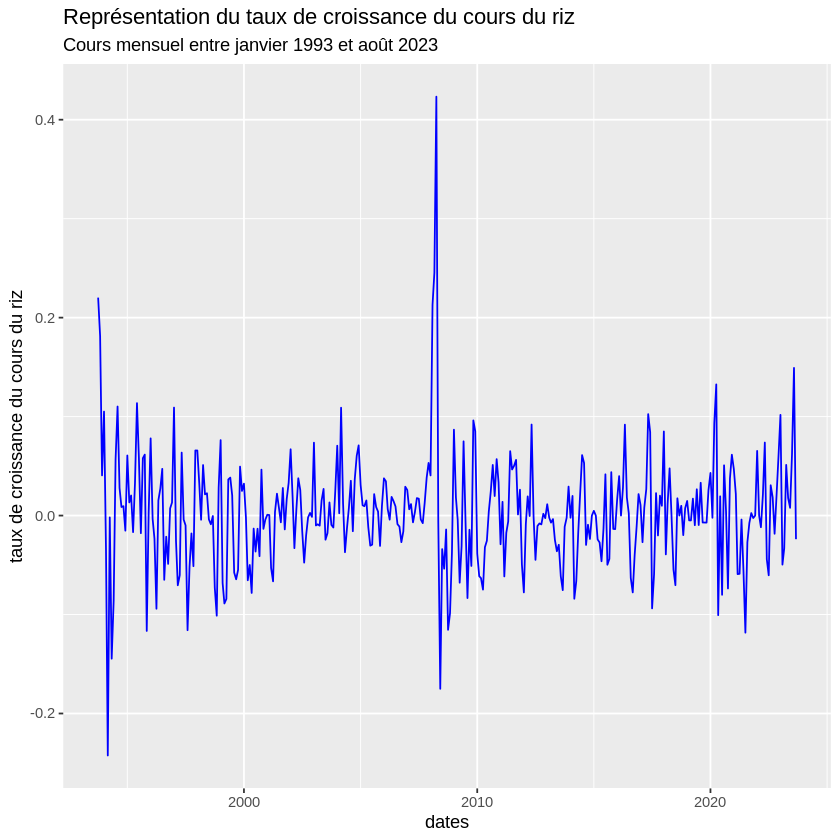

In [40]:
graph_taux_riz <- ggplot(data=df_taux_riz, aes(x=dates, y=gR))+geom_line(color='blue')+
  xlab("dates")+ylab("taux de croissance du cours du riz")+labs(title =
  "Représentation du taux de croissance du cours du riz", subtitle="Cours mensuel entre janvier 1993 et août 2023")
graph_taux_riz

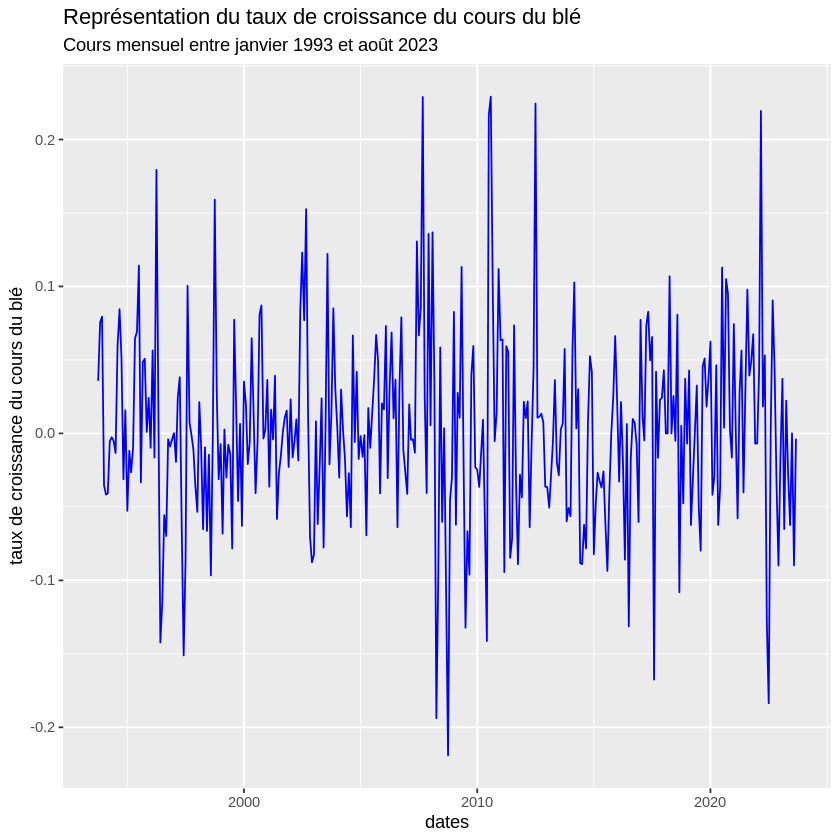

In [41]:
graph_taux_ble <- ggplot(data=df_taux_ble, aes(x=dates, y=gB))+geom_line(color='blue')+
  xlab("dates")+ylab("taux de croissance du cours du blé")+labs(title =
  "Représentation du taux de croissance du cours du blé", subtitle="Cours mensuel entre janvier 1993 et août 2023")
graph_taux_ble

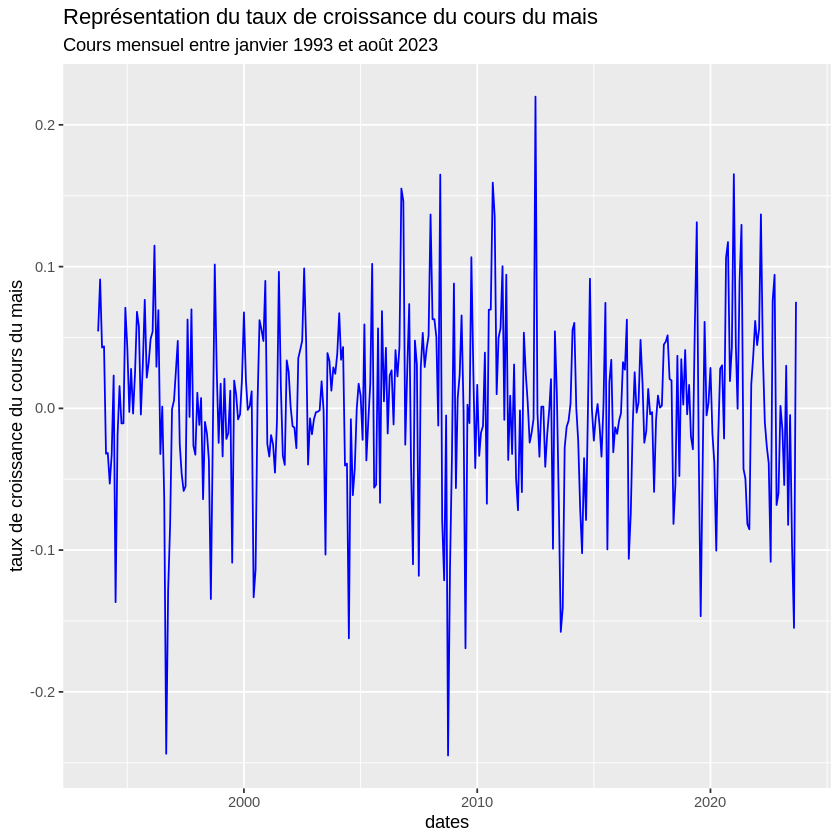

In [42]:
graph_taux_mais <- ggplot(data=df_taux_mais, aes(x=dates, y=gM))+geom_line(color='blue')+
  xlab("dates")+ylab("taux de croissance du cours du mais")+labs(title =
  "Représentation du taux de croissance du cours du mais", subtitle="Cours mensuel entre janvier 1993 et août 2023")
graph_taux_mais

Lorsque l'on considère les rendements du riz, du blé et du maïs, en logarithme, on observe que les rendements sont disparates par rapport à leur moyenne de long terme. Ces variations correspondent à des "clusters de volatilité".


On observe également que les rendements du blé sont plus volatiles que ceux du maïs. En dehors des pics en 1993, 2008, et d'une légère distorsion à partir de 2020, ils sont peu écartés alors que pour le blé et le maïs, les rendements sont beaucoup plus disparates. Une hypothèse pour expliquer cette différence provient du nombre de contrats échangés et de la spéculation. En effet, si l'on regarde le volume de contrats qui arriveront à maturité en mars 2024, il y'a près de 10 000 positions ouvertes sur les contrats à termes de blé contre 238 pour le riz.
On peut ainsi penser que si la majorité des contrats passés sur le riz poursuivent un objectif de couverture (les principaux utilisateurs des marchés dérivés agricoles sont les agriculteurs eux-mêmes), une part non négligeable des contrats à terme sur le blé a plutôt un but spéculatif, ce qui justifierait cette différence d'amplitude des rendements.

$\:$

$\underline{\text{Conclusion de l'analyse graphique}}$

$\:$

On a graphiquement l'intuition que nos séries sont désormais stationnaires. Néanmoins, on relève également la présence de nombreux clusters de volatilité ce qui indique que la variance pourrait ne pas être constante dans le temps.

Afin de trancher sur la stationnarité de nos séries, on réalise à nouveau le test KPSS :

In [43]:
Kpss_rdt_riz <- ur.kpss(y=df_taux_riz$gR,type="mu", lags="short")
summary(Kpss_rdt_riz)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.0495 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [44]:
Kpss_rdt_ble <- ur.kpss(y=df_taux_ble$gB,type="mu", lags="short")
summary(Kpss_rdt_ble)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.0408 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [45]:
Kpss_rdt_mais <- ur.kpss(y=df_taux_mais$gM,type="mu", lags="short")
summary(Kpss_rdt_mais)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.0389 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


Les statistiques de test obtenues sont dans les trois cas inférieures au quantile pour un risque de première espèce 5% :
- Dans le cas du taux de croissance du riz, on a
LM_stat = 0,0495 < 0,463 = $VC_{\alpha = 5\%}$
- Dans le cas du taux de croissance du blé, on a
LM_stat = 0,0408 < 0,463 = $VC_{\alpha = 5\%}$
- Dans le cas du taux de croissance du maïs, on a LM_Stat = 0,0389 < 0,463 =  $VC_{\alpha = 5\%}$

Le test de KPSS confirme ainsi que notre méthode de stationnarisation était adaptée et que les rendements de nos actifs sont des séries stationnaires. On s'intéresse désormais aux autocorrélogrammes :

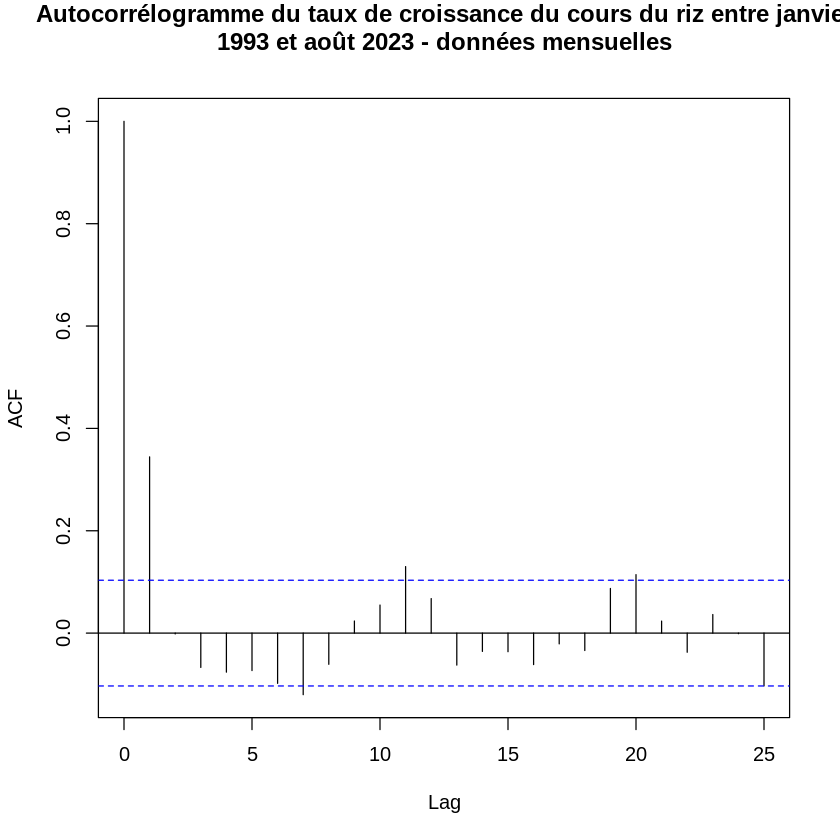

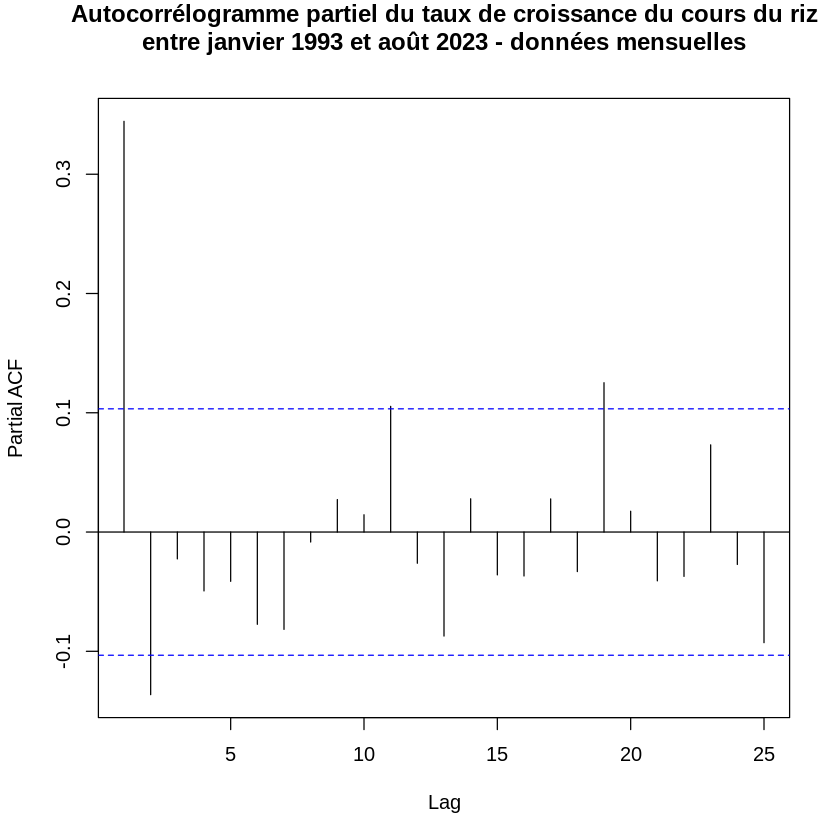

In [46]:
acf_riz_taux<-acf(df_taux_riz$gR, main="Autocorrélogramme du taux de croissance du cours du riz entre janvier
1993 et août 2023 - données mensuelles")
pacf_riz_taux <- pacf(df_taux_riz$gR, main = "Autocorrélogramme partiel du taux de croissance du cours du riz
entre janvier 1993 et août 2023 - données mensuelles")

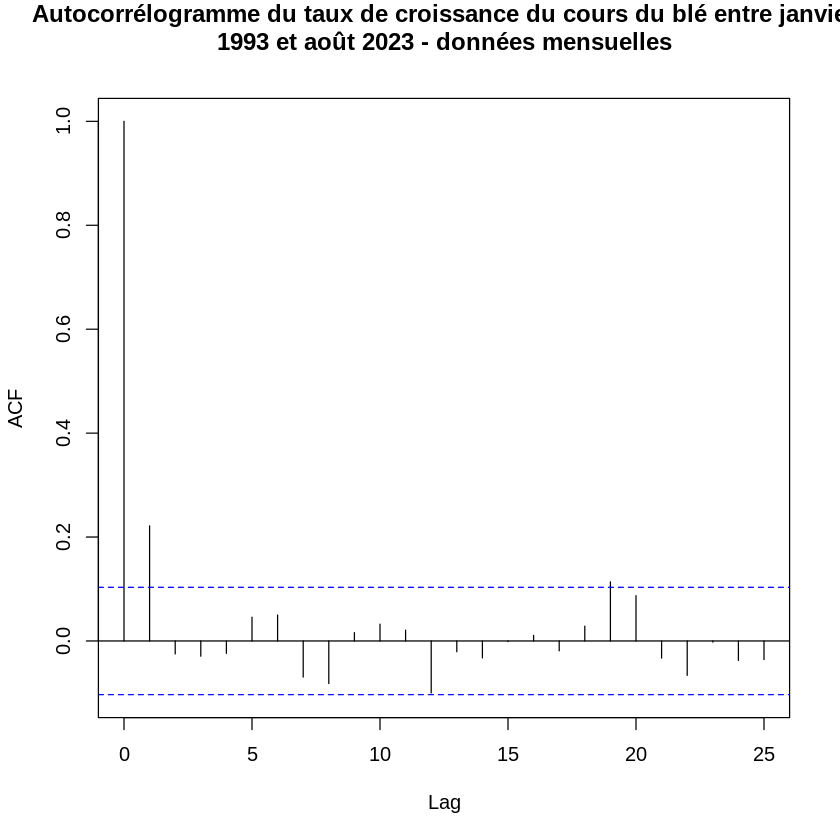

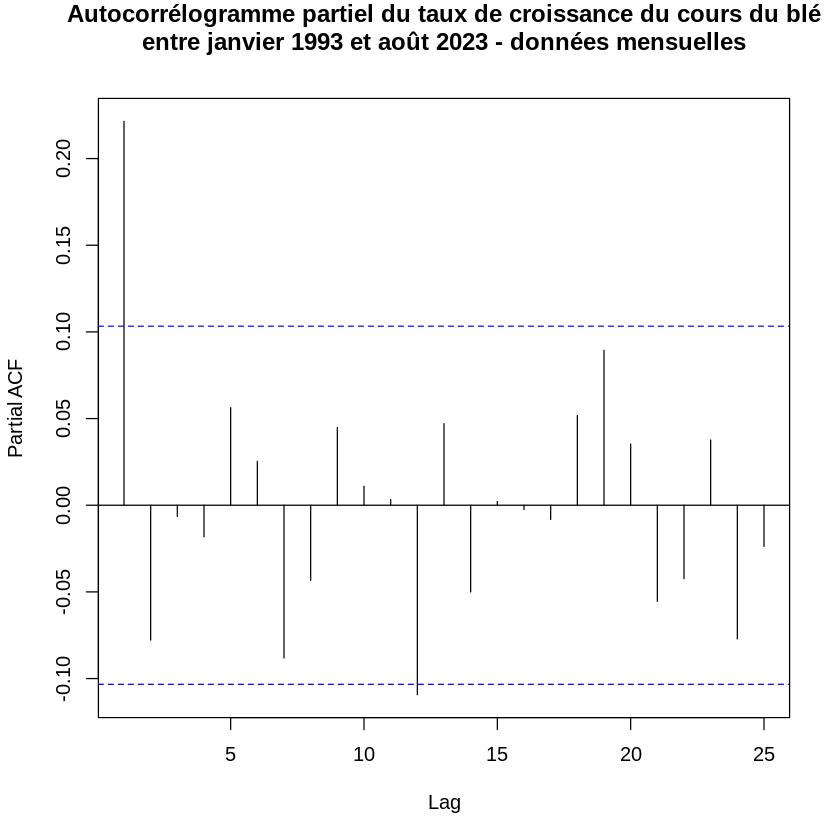

In [47]:
acf_ble_taux<-acf(df_taux_ble$gB, main="Autocorrélogramme du taux de croissance du cours du blé entre janvier
1993 et août 2023 - données mensuelles")
pacf_ble_taux <- pacf(df_taux_ble$gB, main = "Autocorrélogramme partiel du taux de croissance du cours du blé
entre janvier 1993 et août 2023 - données mensuelles")

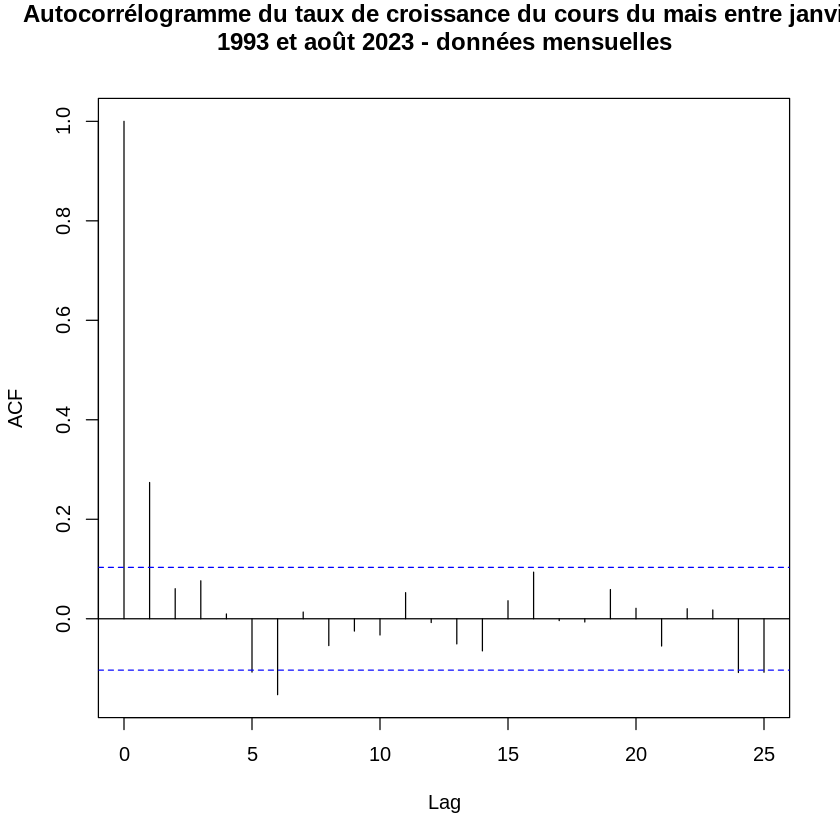

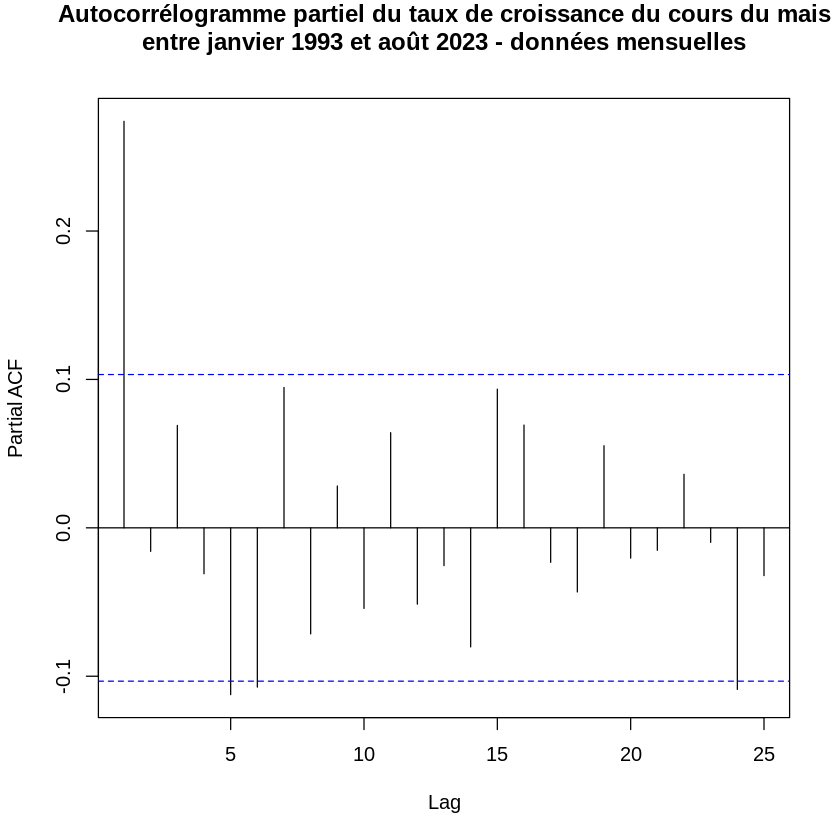

In [48]:
acf_mais_taux<-acf(df_taux_mais$gM, main="Autocorrélogramme du taux de croissance du cours du mais entre janvier
1993 et août 2023 - données mensuelles")
pacf_mais_taux <- pacf(df_taux_mais$gM, main = "Autocorrélogramme partiel du taux de croissance du cours du mais
entre janvier 1993 et août 2023 - données mensuelles")

Dans le cas des rendements du riz, en logarithme, on observe que les autocorrélations sont désormais significatives jusqu'au premier retard et les autocorrélations partielles jusqu'au second retard. L'étude graphique montre cependant que les autocorrélations d'ordre 11 et 20 pourraient être significatives et que l'autocorrélation partielle d'ordre 19 pourrait l'être également.

Pour ce qui est du blé, les autocorrélations devienennt très proches de 0 à partir du premier retard qui est significatif et seule la première autocorrélation partielle semble significative. L'analyse est simlaire pour les rendements du maïs : seules une autocorrélation et une autocorrélation partielle sont significatives.

Dans la suite de notre étude, nous allons nous concentrer sur la série contenant les rendements du riz. Compte tenu de l'analyse de nos autocorrélogrammes, nous avons deux possibilités :

- Fit un modèle ARMA (19, 20) afin de prendre en compte toute l'information qui pourrait être contenue dans les retards d'ordre 20 pour l'autocorrélation, et 19 pour l'autocorrélation partielle.

- Fit un modèle ARMA(2,1), plus parcimonieux, en considérant que seules  les deux premières autocorrélations partielles, et la première autocorrélation, sont significatives.

Un modèle ARMA(2,1) est plus judicieux en vertu du principe de parcimonie qui veut que l'on cherche à minimiser le nombre de paramètre à estimer, à qualité d'ajustement donnée. Un tel modèle a également beaucoup plus de sens qu'un ARMA(19, 20) qui impliquerait que le rendement du riz dépend du rendement observé 19 mois plus tôt, ce qui a peu de sens économiquement. Néanmoins, afin de confirmer le choix du modèle, nous modélisons les deux et retenons celui qui minimise les critères d'information.

Dans l'optique de réaliser des prévisions, on exclut les 3 derniers rendements de notre échantillon afin de les comparer aux valeurs qui seront estimées par le modèle.

In [ ]:
tail(df_taux_riz)

,dates,gR
,<dttm>,<dbl>
355,2023-04-01,0.05118825
356,2023-05-01,0.01780462
357,2023-06-01,0.00781254
358,2023-07-01,0.06222554
359,2023-08-01,0.14917620
360,2023-09-01,-0.02390552


Suite à une difficulté pour modéliser un ARMA(19,20), nous estimons l'ARMA(20,20):

In [49]:
library(forecast)
library(lmtest)
ARMA_riz_19 <- Arima(y=  df_taux_riz$gR[1:357], order = c(20,0,20))
summary(ARMA_riz_19)
coeftest(ARMA_riz_19)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:exuber’:

    index, index<-


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




Series: df_taux_riz$gR[1:357] 
ARIMA(20,0,20) with non-zero mean 

Coefficients:
          ar1      ar2     ar3     ar4      ar5      ar6     ar7     ar8
      -0.0526  -0.1467  0.2039  0.3004  -0.2853  -0.1443  0.0193  0.0982
s.e.   0.9174   0.5087  0.4476  0.1748   0.2925   0.2843  0.4202  0.1604
         ar9     ar10     ar11    ar12    ar13     ar14     ar15     ar16
      0.0514  -0.2495  -0.0835  0.1317  0.1294  -0.0979  -0.1111  -0.2410
s.e.  0.2421   0.1017   0.3079  0.1889  0.2627   0.2221   0.2397   0.2487
        ar17    ar18    ar19    ar20     ma1     ma2      ma3      ma4     ma5
      0.1797  0.4670  0.1239  0.2899  0.4463  0.2275  -0.2249  -0.4264  0.1145
s.e.  0.1892  0.2236  0.6284  0.1800  0.9296  0.8411   0.2028   0.3406  0.4538
         ma6      ma7      ma8      ma9    ma10    ma11    ma12     ma13
      0.1941  -0.0861  -0.2773  -0.1456  0.2076  0.4459  0.0080  -0.3177
s.e.  0.1581   0.4732   0.1381   0.4322  0.2002  0.2837  0.4812   0.1390
        ma14     ma15 


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1       -0.0525796  0.9173716 -0.0573   0.95429    
ar2       -0.1466837  0.5086513 -0.2884   0.77306    
ar3        0.2039204  0.4476372  0.4555   0.64871    
ar4        0.3003755  0.1747532  1.7189   0.08564 .  
ar5       -0.2852517  0.2925267 -0.9751   0.32950    
ar6       -0.1442542  0.2843473 -0.5073   0.61193    
ar7        0.0193001  0.4201977  0.0459   0.96337    
ar8        0.0981663  0.1603983  0.6120   0.54053    
ar9        0.0514459  0.2421224  0.2125   0.83173    
ar10      -0.2494502  0.1016701 -2.4535   0.01415 *  
ar11      -0.0834512  0.3079314 -0.2710   0.78639    
ar12       0.1317108  0.1889190  0.6972   0.48569    
ar13       0.1294198  0.2626978  0.4927   0.62226    
ar14      -0.0978836  0.2221465 -0.4406   0.65948    
ar15      -0.1110629  0.2396907 -0.4634   0.64311    
ar16      -0.2410336  0.2487158 -0.9691   0.33249    
ar17       0.1797296  0.1891859  0.9500   0.34210    
ar

In [52]:
library(forecast)
library(lmtest)
ARMA_riz <- Arima(y=  df_taux_riz$gR[1:357], order = c(2,0,1))
summary(ARMA_riz)
coeftest(ARMA_riz)

Series: df_taux_riz$gR[1:357] 
ARIMA(2,0,1) with non-zero mean 

Coefficients:
         ar1      ar2      ma1    mean
      1.1257  -0.3757  -0.7476  0.0024
s.e.  0.1335   0.0551   0.1352  0.0028

sigma^2 = 0.002845:  log likelihood = 541.74
AIC=-1073.49   AICc=-1073.32   BIC=-1054.1

Training set error measures:
                       ME       RMSE        MAE MPE MAPE      MASE        ACF1
Training set 0.0001167704 0.05303764 0.03706743 NaN  Inf 0.8193264 0.002046855


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1        1.1257040  0.1334820  8.4334 < 2.2e-16 ***
ar2       -0.3757437  0.0550814 -6.8216 9.003e-12 ***
ma1       -0.7476160  0.1352106 -5.5293 3.216e-08 ***
intercept  0.0023527  0.0028496  0.8256     0.409    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


On observe que les résultats des critères d'information sont contradictoires :
- Critère AIC : ARMA(20,20) = -1073,06 < ARMA(2,1) :  -1073,49
- Critère AICc : ARMA(20,20) = -1061,55 > ARMA(2,1) = -1073,32
- Critère BIC : ARMA(20,20) = -910,19 > ARMA(2,1) = -1054,1

On choisit de conserver le modèle qui minimise le critère BIC car nous avons une partie AR. Nous utiliserons donc systématiquement le modèle BIC pour la suite de notre étude dès que nous aurons besoin de minimiser les critères d'informations. Compte tenu de nos valeurs, nous retenons l'ARMA(2,1) comme modèle .

Par ailleurs, nous étudions la significativité des coefficients des retards en réalisant un test de Student :

$\:$

**$\underline{\text{Hypothèses}}$** : $\left\{\begin{array}{c}H_0: \phi_i = 0\\H_1:\phi_i≠0\end{array}\right.$

$\:$

**$\underline{\text{Statistique de test}}$** : $t_{\phi_i} = \frac{\hat{\phi_i}}{\hat{\sigma_{\hat{\phi_i}}}}$

$\:$

**$\underline{Loi}$** : $|t_{\phi_i}^*|$ ~ N(0,1) car la taille de l'échantillon est N = 358 > 30.

$\:$

**$\underline{\text{Règle de décision}}$** : Rejet de $H_0$ au seuil $\alpha$ si $|t*| > 1,96$ pour un risque de première espèce de 5% et $|t*| > 2,57$ pour un risque de première espèce de 1%.

$\:$

La statistique de test des coefficients de l'ARMA(2,1), pour un RPE de 5%, est : $|t_{ϕ_1}^*| = 8,4334 > 1,96$, $|t_{ϕ_2}^*| = 6,8216 > 1,96$ et $|t_{θ_1}^*| = 5,5293 > 1,96$.

Dans les 3 cas, on rejette l'hypothèse nulle d'absence de significativité du coefficient. En outre, on observe que le coefficient de la constante n'est  pas significatif car $|t_c^*\ = 0,8256 < 1,96$.

On conserve donc le modèle ARMA(2,1) puisque l'ensemble des coefficients sont significatifs et que le critère BIC est plus faible que pour l'ARMA(20,20). Afin de s'assurer que nous avons sélectionné le nombre de retards optimal pour les parties AR et MA, nous estimons :
- Un modèle ARMA(3,1) : ajout d'un retard dans la partie AR
- Un modèle ARMA(2,2) : ajout d'un retard dans la partie MA

Nous ne modifierons le modèle que si :    
- Les critères d'information sont meilleurs
- Les retards ajoutés sont significatifs


In [53]:
ARMA_riz_3 <- Arima(y=  df_taux_riz$gR[1:357], order = c(3,0,1))
summary(ARMA_riz_3)
coeftest(ARMA_riz_3)

Series: df_taux_riz$gR[1:357] 
ARIMA(3,0,1) with non-zero mean 

Coefficients:
         ar1      ar2     ar3      ma1    mean
      1.1966  -0.4396  0.0487  -0.8066  0.0023
s.e.  0.1480   0.1011  0.0659   0.1370  0.0028

sigma^2 = 0.002848:  log likelihood = 542.03
AIC=-1072.06   AICc=-1071.82   BIC=-1048.79

Training set error measures:
                       ME       RMSE        MAE MPE MAPE      MASE        ACF1
Training set 0.0001188982 0.05299547 0.03692903 NaN  Inf 0.8162672 -0.00829151


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1        1.1966475  0.1480105  8.0849 6.222e-16 ***
ar2       -0.4395688  0.1010838 -4.3486 1.370e-05 ***
ar3        0.0486503  0.0659042  0.7382    0.4604    
ma1       -0.8065931  0.1369898 -5.8880 3.909e-09 ***
intercept  0.0023451  0.0028118  0.8340    0.4043    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [54]:
ARMA_riz_3 <- Arima(y=  df_taux_riz$gR[1:357], order = c(2,0,2))
summary(ARMA_riz_3)
coeftest(ARMA_riz_3)

Series: df_taux_riz$gR[1:357] 
ARIMA(2,0,2) with non-zero mean 

Coefficients:
         ar1      ar2      ma1      ma2    mean
      1.0540  -0.2737  -0.6612  -0.1205  0.0023
s.e.  0.1509   0.1356   0.1549   0.1413  0.0028

sigma^2 = 0.002847:  log likelihood = 542.11
AIC=-1072.21   AICc=-1071.97   BIC=-1048.95

Training set error measures:
                       ME       RMSE        MAE MPE MAPE      MASE        ACF1
Training set 0.0001193048 0.05298388 0.03689896 NaN  Inf 0.8156027 -0.01084293


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1        1.0539884  0.1508867  6.9853 2.843e-12 ***
ar2       -0.2737127  0.1356350 -2.0180   0.04359 *  
ma1       -0.6612317  0.1548562 -4.2700 1.955e-05 ***
ma2       -0.1205214  0.1412602 -0.8532   0.39356    
intercept  0.0023446  0.0028052  0.8358   0.40327    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


**$\underline{\text{Conclusion de l'estimation du modèle ARMA}}$** :    

$\:$

Dans le cas du modèle ARMA(3,1), on observe que le coefficient associé à l'AR(3) n'est pas significatif : on a $|t_{\phi_3}^*| = 0,7382 < 1,96$ donc on rejette l'hypothèse de significativité du coefficient du troisème retard de la partie autorégressive. Il n'est donc pas nécessaire d'ajouter un retard sur le partie AR.

Pour ce qui est du modèle ARMA(2,2), on observe que le coefficient associé au MA(2) n'est pas significatif : on a $|t_{\theta_3}^*| = 0,8532 < 1,96$. Il n'est donc pas nécessaire d'ajouter un retard sur le partie MA.

Par ailleurs, les critères BIC obtenus pour les 3 modèles sont les suivants :
 - ARMA(2,1) : -1054,1
 - ARMA(3,1) : -1048,79
 - ARMA(2,2) : -1048,95

$\underline{\text{Conclusion de la sélection du modèle ARMA}}$:

Compte tenu des résultats de ces tests, notre modèle est un ARMA(2,1) sans composante déterministe car le coefficient de la constante n'est pas significatif. Il s'écrit :

$rdt\_riz_t = 1.1257040*rdt\_riz_{t-1} - 0.3757437*rdt\_riz_{t-2} + ϵ_t - 0.7476160 * ϵ_{t-1}$

L'existence d'une relation avec les rendements d'il y'a deux mois peut être expliquée par le fonctionnement des marchés de futures. En effet, on observe que les principaux contrats à terme sur le riz ont une maturité de 2 ou 3 mois. Ainsi, on peut voir les rendements des précédents contrats, d'échéance relativement courte, comme un indicateur du rendement que l'on peut attendre sur un contrat future sur le riz.

On compare les rendements estimés par notre modèle et les rendements observés :

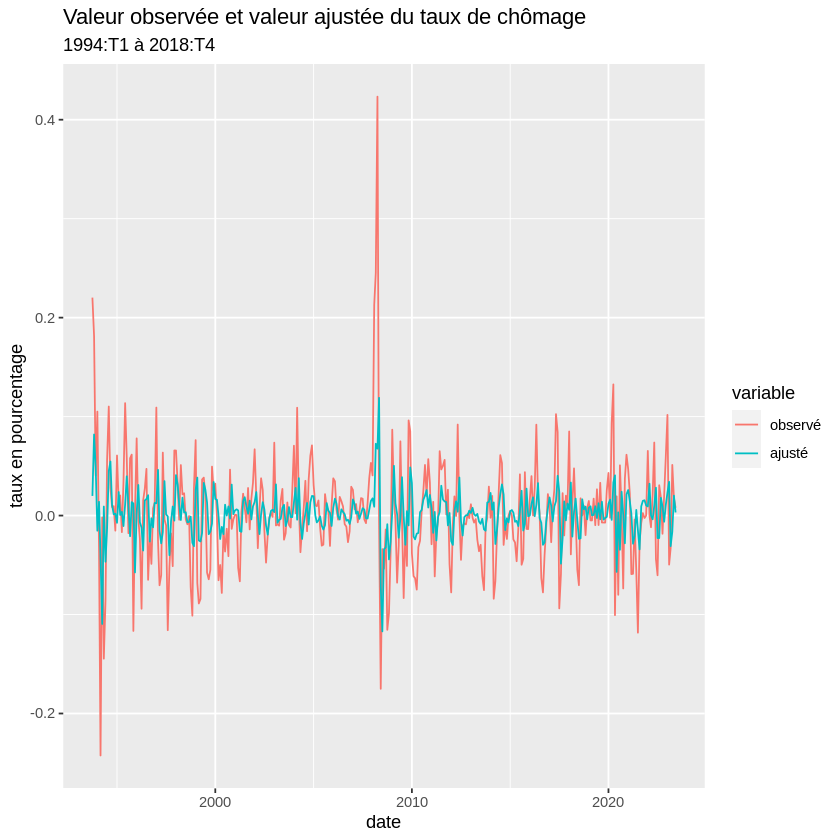

In [55]:
library(ggplot2)
library(reshape2)

df_plot<-data.frame(df_taux_riz$dates[1:357],df_taux_riz$gR[1:357],F=as.matrix(ARMA_riz$fitted))
colnames(df_plot)<-c("date","observé","ajusté")

data_melt=melt(as.data.frame(df_plot),id.vars = 1)

p_F_us<-ggplot(data=data_melt,aes(x=date))+geom_line(aes(x=date,y=value,color= variable))
p_F_us+labs(y="taux en pourcentage",title = "Valeur observée et valeur ajustée du taux de chômage",
            subtitle = "1994:T1 à 2018:T4")

Deux commentaires s'imposent par rapport à ce graphique :    
- Notre modèle fit correctement les données que nous avons, le choix d'un ARMA(2,1) semble donc cohérent.
- En revanche, il a une amplitude beaucoup plus faible que notre série.

Intuitivement, on peut penser que cet écart par rapport aux rendements observés s'explique par les résidus. Nous allons réaliser plusieurs tests pour étudier leurs propriétés mais en l'état, il semble que ce modèle ARMA(2,1) ne soit pas idéal pour réaliser des prévisions : les rendements obtenus seront nécessairement sur ou sous-estimés par rapport à la réalité.


Maintenant que nous avons notre modèle ARMA, on doit vérifier trois hypothèses :
- L'absence de racine unitaire, et de racine commune entre nos parties AR et MA
- La partie MA doit être inversible, ce qui implique que les racines du polynôme obtenu en utilisant l'opérateur retard doivent être de module supérieur à 1.
- La partie AR doit être stationnaire, ce qui implique que les racines du polynôme obtenu en utilisant l'opérateur retard doivent être de module supérieur à 1.

Pour ce faire, on représente l'inverse des racines et on vérifie qu'elles sont bien dans le cercle unité :


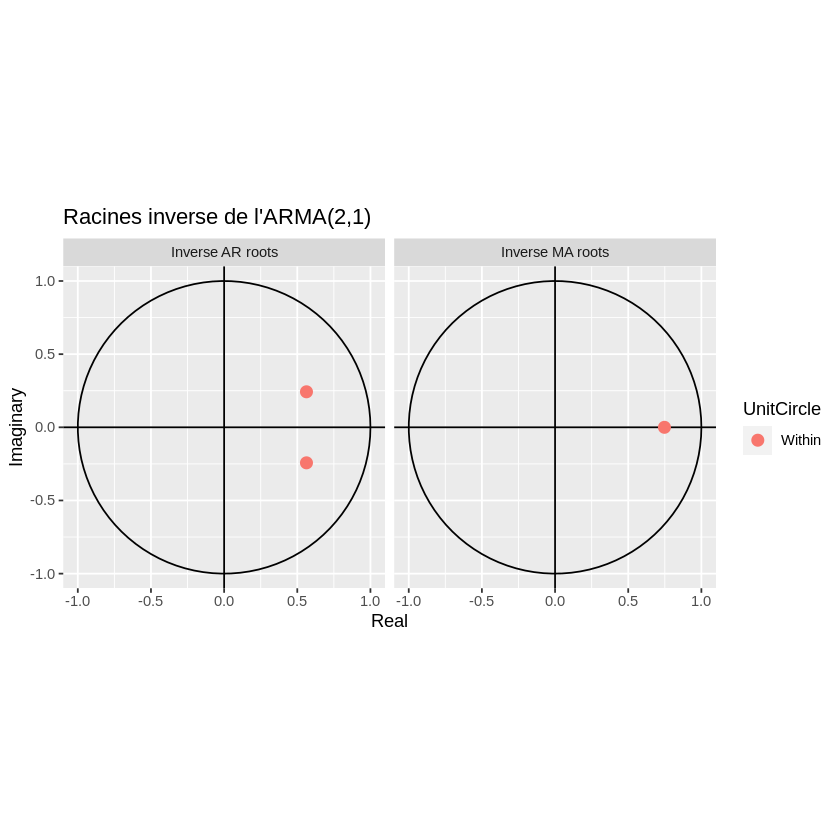

In [56]:
autoplot(ARMA_riz,main="Racines inverse de l\'ARMA(2,1)")

L'ensemble de nos racines sont contenus dans le cercle unité, les conditions de stationnarité et d'inversibilité sont donc satisfaites. On cherche désormais à tester les propriétés de nos résidus, à savoir :
- Est ce que nos résidus sont autocorrélés ?
- Est ce que nos résidus sont normaux ?
- Est ce que nos résidus sont homoscédastiques ?

#$\color{red}{\text{V) Tests sur les résidus}}$

On met en oeuvre 3 tests pour vérifier les propriétés de nos résidus :
- test de Ljung-Box
- test de Jarque et Bera
- Test d'absence d'effet ARCH d'Engle et Granger

##$\color{red}{\text{1) Tests d'absence d'autocorrélation}}$

On commence par réaliser le test de Ljung-Box d'absence d'autocorrélation des résidus. On considère k retards :

$\:$

**$\underline{\text{Hypothèses}}$** : $\left\{\begin{array}{c}H_0: ρ_1 = ρ_2 = ... = ρ_k = 0 => x_t stationnaire\\H_1: ∃i ∈ \{1,2,...,k\} ρ_i ≠ 0 \end{array}\right.$

$\:$

**$\underline{\text{Statistique de test}}$** : $Q_k^* = T(T+2)Σ_{j=1}^k\frac{1}{T-j}*\hat{\rho}_j^2$ où T représente la taille de notre échantillon.

$\:$

**$\underline{Loi}$** : $Q_k^* → χ^2(k - p - q)$

$\:$

**$\underline{\text{Règle de décision}}$** : Rejet de $H_0$ au seuil $\alpha$ si $Q_k^*$ est supérieure au quantile d'ordre 1-$\alpha$ de la loi du chi-deux à k - p - q degrés de liberté. On peut également utiliser la p-value comme critère de décision. Dans ce cas, on rejette l'hypothèse nulle d'absence d'autocorrélation si la p_value est inférieure au risque de première espèce choisit.



	Ljung-Box test

data:  Residuals from ARIMA(2,0,1) with non-zero mean
Q* = 4.8365, df = 7, p-value = 0.6799

Model df: 3.   Total lags used: 10



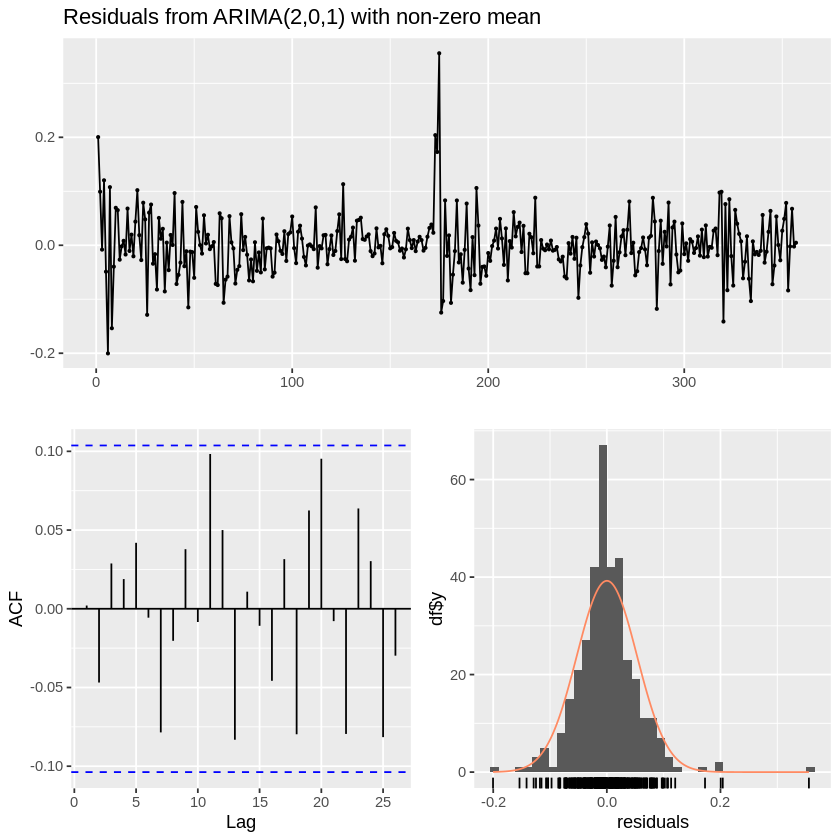

In [57]:
test_resARMA_riz <- checkresiduals(ARMA_riz,lag = 10)

On remarque qu'aucun de nos résidus n'est significatif. En outre, la p-value calculée est de 0,6799 > 5% ce qui implique qu'on ne peut pas rejeter l'hypothèse nulle d'absence d'autocorrélation des résidus.

##$\color{red}{\text{2) Tests de normalité des résidus}}$

On s'intéresse désormais à l'hypothèse de normalité des résidus. Pour cela, on réalise le test de Jarque et Bera.

Ce dernier est basé sur les moments d'ordre 3 et 4 de la distribution des résidus qui sont comparés aux moments d'ordre 3 et 4 d'une loi normale, à savoir :
- Skewness : 0, la distribution de la loi normale est parfaitement symétrique autour de sa moyenne. Il permet de mesurer le degré d'asymétrie d'une distribution
- Kurtosis : 3, il mesure le degré d'aplatissement de la distribution et dépend de la probabilité d'occurence des valeurs extrêmes.

Dans notre cas, on a :

[1] "Skewness des residus : 0.943070"

[1] "kurtosis des residus : 9.623068"

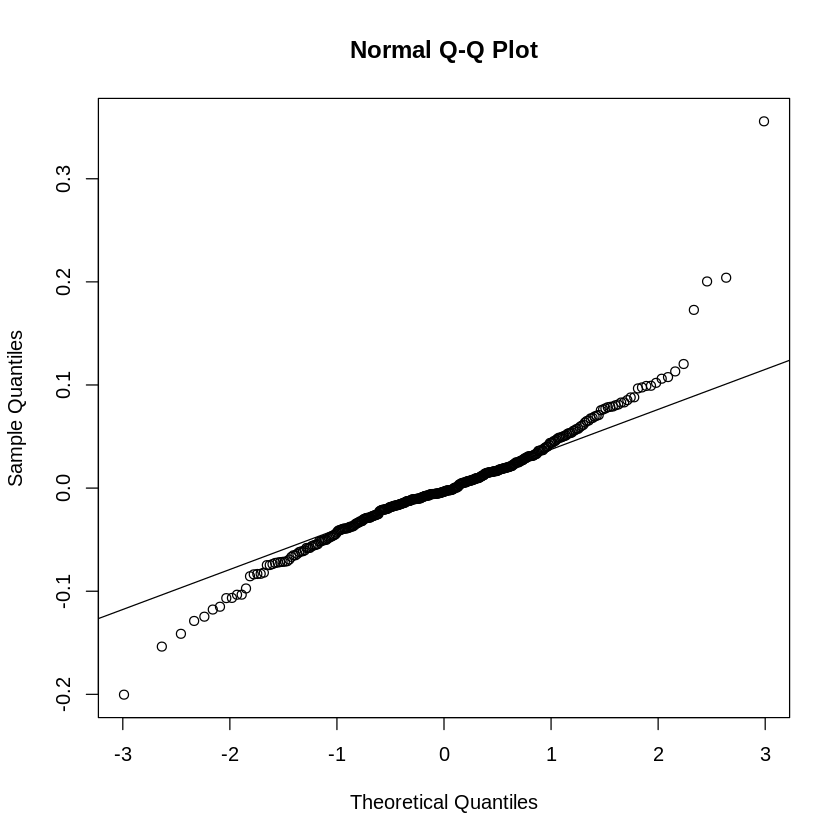

In [58]:
#install.packages("moments")
library(moments)
sprintf("Skewness des residus : %f",skewness(ARMA_riz$residuals))
sprintf("kurtosis des residus : %f",kurtosis(ARMA_riz$residuals))
qqnorm(ARMA_riz$residuals)
qqline(ARMA_riz$residuals)

On observe que nos résidus sont skew-positif et que la kurtosis est 3 fois plus élevés que dans le cas d'une loi normale. On peut donc penser que nos résidus ne sont pas normaux, hypothèse qui semble confirmée par le qq-plot (décalage important entre la distribution théorique et empirique).

Pour confirmer notre intuition, on met en oeuvre le test de Jarque et Bera :

$\:$

**$\underline{\text{Hypothèses}}$** : $\left\{\begin{array}{c}H_0: S(X) = 0  \: et \: K(X) = 3 \\H_1:S(X) ≠ 0 \: ou \: K(X)≠ 3 \end{array}\right.$

$\:$

**$\underline{\text{Statistique de test}}$** : $JB = \frac{T-k}{6}[\hat{S}^2+ \frac{1}{4}*(\hat{K}-3)^2]$ avec
- T : taille de l'échantillon
- k : nombre de paramètres
- $\hat{S}$ : skewness estimé
- $\hat{K}$ : kurtosis estimée

$\:$

**$\underline{Loi}$** : $JB \underset{H_0}\sim  χ^2(2)$

$\:$

**$\underline{\text{Règle de décision}}$** : Rejet de $H_0$ au seuil $\alpha$ si JB > $χ^2(2)_{1-\alpha}$ ou si la p-value est inférieure au risque de première espèce considéré.

On a :


In [59]:
library(tseries)
jarque.bera.test(ARMA_riz$residuals)


	Jarque Bera Test

data:  ARMA_riz$residuals
X-squared = 705.41, df = 2, p-value < 2.2e-16


On observe que la p-value est très proche de 0 donc on rejette l'hypothèse nulle de normalité des résidus. Ce résultat est en accord avec nos observations graphiques. Il s'explique essentiellement par le nombre élevé de points extrêmes dans notre série dû à la volatilité  élevée des rendements du riz avec beaucoup de points extrêmes (2008, 1994, ...).

##$\color{red}{\text{3) Tests d'un effet ARCH}}$

La dernière vérification que l'on effectue sur les erreurs pour valider le modèle porte sur l'homoscédasticité. Cette notion correspond à l'absence d'irrégularité au niveau de la variance des résidus, c'est à dire que la variance du résidu ne dépend pas du temps.

Si la série des erreurs est hétéroscédastique, alors il conviendra de prendre cette information en compte dans le modèle pour ajuster nos prévisions. On parle d'effet ARCH.

Le test d'un effet ARCH est fondé sur l'estimation de la régression :

$\hat{ϵ}_t^2 = \alpha_0  + \alpha_1 \hat{ϵ}_{t-1}^2 + ... + \alpha_q \hat{ϵ}_{t-q}^2 + u_t$


$\:$


**$\underline{\text{Hypothèses}}$** : $\left\{\begin{array}{c}H_0: \alpha_1 = \alpha_2 = ... = \alpha_q =  0 \\H_1: \alpha_1 ≠ 0   \: ou \: \alpha_2 ≠ 0 ~...ou \: \alpha_q ≠ 0 \end{array}\right.$

$\:$

**$\underline{\text{Statistique de test}}$** : $LM_{stat} = TR^2 \to χ^2(q)$ avec
- T : taille de l'échantillon
- $R^2$ : le coefficient de détermination


$\:$

**$\underline{\text{Règle de décision}}$** : Rejet de $H_0$ au seuil $\alpha$ si LM_stat > $χ^2(q)_{1-\alpha}$ ou si la p-value est inférieure au risque de première espèce considéré.

$\:$

Les résultats du test d'effet ARCH sont les suivants :

In [60]:
library(FinTS)
ArchTest(ARMA_riz$residuals,lags=4)


Attaching package: ‘FinTS’


The following object is masked from ‘package:forecast’:

    Acf





	ARCH LM-test; Null hypothesis: no ARCH effects

data:  ARMA_riz$residuals
Chi-squared = 66.903, df = 4, p-value = 1.022e-13


Nous prenons 4 retards pour notre modèle de régression linéaire sur les variances des résidus. Ainsi, on rejette l'hypothèse nulle d'absence d'effet ARCH au seuil de 0.01%

Ce résultat est tout à fait cohérent avec le fait que nous travaillons sur des données financières. En effet, les séries financières se composent de périodes de faible volatilité ainsi que de périodes de fortes volatilité liés à  l'activité sur les marchés financiers. De plus, ce résultat est en accord avec ce que l'on observe graphiquement.

Ainsi, il est primordial de capturer la variance des erreurs quadratiques pour améliorer la précision de nos prévisions. Pour ce faire, nous allons tester un modèle GARCH en annexe.

#$\color{red}{\text{VI) Prévisions du modèle}}$
On réalise des prévisions du niveau des rendements du riz sur les 3 derniers mois de notre échantillon : juillet, août et septembre 2023. On a :

    Point Forecast      Lo 95     Hi 95
358  -0.0008098809 -0.1053491 0.1037293
359  -0.0032589378 -0.1150206 0.1085027
360  -0.0027760310 -0.1146592 0.1091071

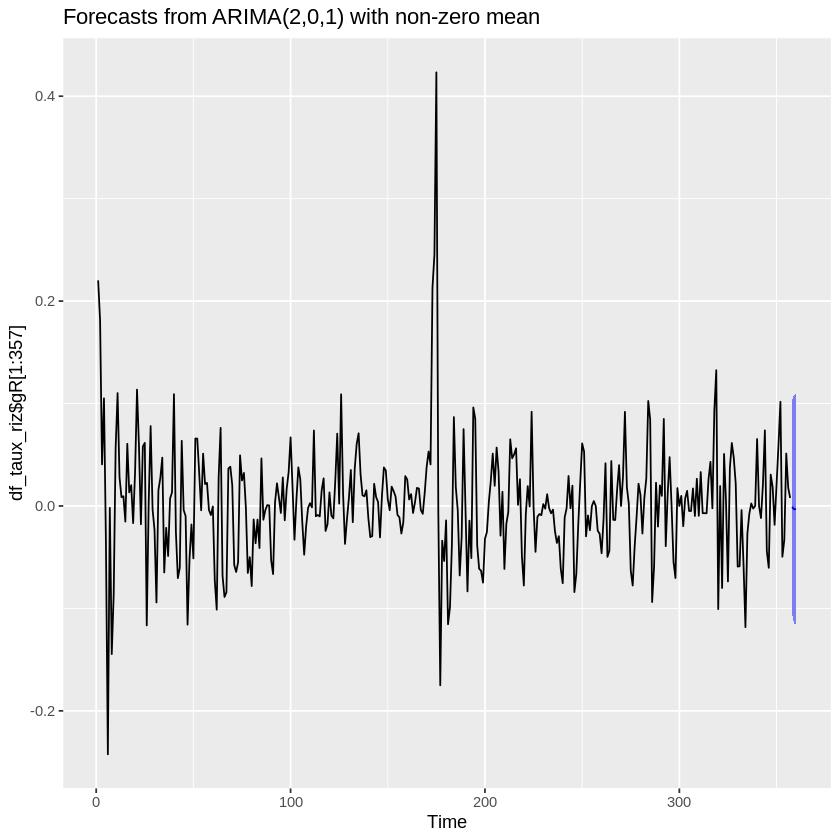

In [61]:
forecast_ARMA_riz<-forecast(ARMA_riz,h=3,level=95)
forecast_ARMA_riz
autoplot(forecast_ARMA_riz)

Le rendement mensuel du riz, pour le mois de juillet 2023, est donné par :

$rdt\_riz_{202307} = 1.1257040*rdt\_riz_{202306} - 0.3757437*rdt\_riz_{202305} + ϵ_{202307} - 0.7476160 * ϵ_{202306}$

Etant donné que la valeur du choc en juillet n'est pas connu en juin, on remplace $ϵ_t$ par son espérance, soit 0. On utilise ensuite les dernières valeurs connus :

In [62]:
head(ARMA_riz$residuals)
tail(ARMA_riz$residuals)

A Time Series:
[1]  0.200401832  0.099245637 -0.008033759  0.120345334 -0.048912165
[6] -0.200318500

A Time Series:
[1]  0.078416090 -0.083649486 -0.002173998  0.067567998 -0.002313945
[6]  0.004685259

In [63]:
tail(df_taux_riz[355:357,])


,dates,gR
,<dttm>,<dbl>
355,2023-04-01,0.05118825
356,2023-05-01,0.01780462
357,2023-06-01,0.00781254


In [64]:
tail(df_riz_log[355:358,])

,dates,riz
,<dttm>,<dbl>
355,2023-03-01,6.165418
356,2023-04-01,6.216606
357,2023-05-01,6.234411
358,2023-06-01,6.242223


On a calculé les rendements du riz en calculant les taux de croissance mensuels des prix, en logarithme. Autrement dit, l'opération effectuée correspond à :

$rdt\_riz_t = ln(prix\_riz_{t+1}) - ln(prix\_riz_t)$
$<=> rdt\_riz_t = ln(\frac{prix\_riz_{t+1}}{prix\_riz_t})$

Ainsi, pour déterminer le niveau des prix du riz en t+1, il est nécessaire de recolorer nos prévisions. Autrement dit, on réécrit la formule de notre rendement en isolant le prix en t+1, soit :

$<=> prix\_riz_{t+1} = e^{(ln(prix\_riz_t) + rdt\_riz_t)}$

Ainsi, sur la base des prévisions obtenues, on peut déterminer le niveau des prix en juillet 2023 :

$prix\_riz_{202307} = e^{6,242223 - 0,001} ≈ 513,49$

On utilise ce niveau de prix estimé pour déterminer le niveau des prix en août et septembre. On a ainsi :

$prix\_riz_{202308} = e^{(ln(513,49) - 0,003)} = e^{6,241223 - 0,0033} ≈ 511,79$

$prix\_riz_{202309} = e^{(ln(511,79) - 0,0028)} = e^{6,237923 - 0,0028} ≈ 510,36$

On observe que les valeurs prévues sont plus faibles que les valeurs observées. Ce décalage peut être expliquée de plusieurs manières. Premièrement, notre modèle ARMA(2,1) sous-estime l'amplitude de notre série, il prédit des rendements beaucoup plus proches de la moyenne que ce que l'on observe en réalité. La seconde raison correspond à une particularité des derniers mois de notre échantillon : suite au phénomène climatique El Nino, les récoltes ont été mauvaises dans plusieurs pays producteurs, notamment l'Inde. Or, des élections auront lieu dans ce pays d'ici 1 an, c'est pourquoi le gouvernement indien a décidé de restreindre ses exportations afin de privilégier sa population. Cette décision a provoqué une montée importante des cours qui ont atteint leur niveau le plus haut depuis ... 2008.

Pour conclure sur la réalisation de ces prévisions, on a observé que nos résidus présentent un effet ARCH et ne sont pas normaux. Dans de telles circonstances, les prévisions de notre modèle ARMA(2,1) ne peuvent pas être satisfaisantes puisque ce dernier ne vérifie pas l'ensemble des conditions sur les résidus. On va essayer d'améliorer ces prévisions en excluant la période de 2008.

#$\color{red}{\text{Annexe : Etude sans la crise des subprimes}}$

Nous savons que nos séries ont été affectées par plusieurs évènements majeurs, notamment la crise des subprimes. Cette période est de loin celle où les prix se sont le plus envolés. On s'interroge donc sur la possibilité d'améliorer notre modèle en excluant cette période.

On considère que la crise des subprimes s'est étendue de décembre 2007 à juin 2009 en s'appuyant sur les données du site NBER. On construit ainsi une variable indicatrice pour tenir compte de chacun de ces mois :

In [ ]:
df_taux_riz$DUM9401 <- as.numeric(df_taux_riz$dates=="1994-01-01")
df_taux_riz$DUM9402 <- as.numeric(df_taux_riz$dates=="1994-02-01")
df_taux_riz$DUM9403 <- as.numeric(df_taux_riz$dates=="1994-03-01")
df_taux_riz$DUM9404 <- as.numeric(df_taux_riz$dates=="1994-04-01")
df_taux_riz$DUM9405 <- as.numeric(df_taux_riz$dates=="1994-05-01")
df_taux_riz$DUM9406 <- as.numeric(df_taux_riz$dates=="1994-06-01")
df_taux_riz$DUM0712 <- as.numeric(df_taux_riz$dates=="2007-12-01")
df_taux_riz$DUM0801 <- as.numeric(df_taux_riz$dates=="2008-01-01")
df_taux_riz$DUM0802 <- as.numeric(df_taux_riz$dates=="2008-02-01")
df_taux_riz$DUM0803 <- as.numeric(df_taux_riz$dates=="2008-03-01")
df_taux_riz$DUM0804 <- as.numeric(df_taux_riz$dates=="2008-04-01")
df_taux_riz$DUM0805 <- as.numeric(df_taux_riz$dates=="2008-05-01")
df_taux_riz$DUM0806 <- as.numeric(df_taux_riz$dates=="2008-06-01")
df_taux_riz$DUM0807 <- as.numeric(df_taux_riz$dates=="2008-07-01")
df_taux_riz$DUM0808 <- as.numeric(df_taux_riz$dates=="2008-08-01")
df_taux_riz$DUM0809 <- as.numeric(df_taux_riz$dates=="2008-09-01")
df_taux_riz$DUM0810 <- as.numeric(df_taux_riz$dates=="2008-10-01")
df_taux_riz$DUM0811 <- as.numeric(df_taux_riz$dates=="2008-11-01")
df_taux_riz$DUM0812 <- as.numeric(df_taux_riz$dates=="2008-12-01")
df_taux_riz$DUM0901 <- as.numeric(df_taux_riz$dates=="2009-01-01")
df_taux_riz$DUM0902 <- as.numeric(df_taux_riz$dates=="2009-02-01")
df_taux_riz$DUM0903 <- as.numeric(df_taux_riz$dates=="2009-03-01")
df_taux_riz$DUM0904 <- as.numeric(df_taux_riz$dates=="2009-04-01")
df_taux_riz$DUM0905 <- as.numeric(df_taux_riz$dates=="2009-05-01")
df_taux_riz$DUM0906 <- as.numeric(df_taux_riz$dates=="2009-06-01")
yreg <- c("DUM9401","DUM9402","DUM9403", "DUM9404", "DUM9405", "DUM0712",
"DUM0801","DUM0802", "DUM0803","DUM0804","DUM0805","DUM0806","DUM0807","DUM0808",
"DUM0809","DUM0810",  "DUM0811",
"DUM0812","DUM0901","DUM0902","DUM0903","DUM0904","DUM0905","DUM0906")
head(df_taux_riz)

,dates,gR,DUM0709,DUM0710,DUM0711,DUM0712,DUM0801,DUM0802,DUM0803,DUM0804,⋯,DUM0903,DUM0904,DUM0905,DUM0906,DUM9401,DUM9402,DUM9403,DUM9404,DUM9405,DUM9406
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1993-10-01,0.22022668,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1993-11-01,0.18118492,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1993-12-01,0.04059451,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1994-01-01,0.10504845,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,0,0,0,0,0
5,1994-02-01,-0.03501608,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0
6,1994-03-01,-0.24241904,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0


On estime ensuite notre modèle ARMA(2,1) en enlevant ces périodes :

In [ ]:
ARMA_riz_dum <- Arima(y=df_taux_riz$gR[1:357], order = c(2,0,1),xreg=as.matrix(df_taux_riz[1:357, yreg]))
summary(ARMA_riz_dum)
coeftest(ARMA_riz_dum)

Series: df_taux_riz$gR[1:357] 
Regression with ARIMA(2,0,1) errors 

Coefficients:
         ar1     ar2      ma1  intercept  DUM9401  DUM9402  DUM9403  DUM9404
      0.6056  -0.270  -0.2734     0.0018   0.1319  -0.0149  -0.2452  -0.0026
s.e.  0.3002   0.092   0.3091     0.0026   0.0443   0.0468   0.0474   0.0472
      DUM9405  DUM0712  DUM0801  DUM0802  DUM0803  DUM0804  DUM0805  DUM0806
      -0.1049   0.0408   0.0421   0.2161   0.2456   0.4213  -0.0082  -0.1772
s.e.   0.0429   0.0425   0.0448   0.0449   0.0453   0.0453   0.0452   0.0453
      DUM0807  DUM0808  DUM0809  DUM0810  DUM0811  DUM0812  DUM0901  DUM0902
      -0.0358  -0.0554  -0.0159  -0.1174  -0.1007  -0.0392   0.0855   0.0180
s.e.   0.0453   0.0453   0.0453   0.0453   0.0453   0.0453   0.0453   0.0453
      DUM0903  DUM0904  DUM0905  DUM0906
      -0.0047  -0.0721   -0.043   0.0588
s.e.   0.0452   0.0451    0.045   0.0427

sigma^2 = 0.00195:  log likelihood = 621.8
AIC=-1185.6   AICc=-1180.28   BIC=-1073.14

Training set 


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1        0.6055641  0.3001916  2.0173  0.043669 *  
ar2       -0.2700070  0.0920480 -2.9333  0.003354 ** 
ma1       -0.2734466  0.3090642 -0.8848  0.376288    
intercept  0.0018338  0.0025609  0.7161  0.473951    
DUM9401    0.1318990  0.0443014  2.9773  0.002908 ** 
DUM9402   -0.0149429  0.0467737 -0.3195  0.749369    
DUM9403   -0.2451702  0.0474315 -5.1689 2.354e-07 ***
DUM9404   -0.0025723  0.0472051 -0.0545  0.956543    
DUM9405   -0.1048659  0.0428633 -2.4465  0.014424 *  
DUM0712    0.0407750  0.0424941  0.9595  0.337284    
DUM0801    0.0421345  0.0448362  0.9397  0.347349    
DUM0802    0.2160712  0.0449294  4.8091 1.516e-06 ***
DUM0803    0.2456126  0.0452566  5.4271 5.727e-08 ***
DUM0804    0.4213388  0.0452727  9.3067 < 2.2e-16 ***
DUM0805   -0.0081880  0.0452488 -0.1810  0.856403    
DUM0806   -0.1772034  0.0452544 -3.9157 9.014e-05 ***
DUM0807   -0.0357992  0.0452572 -0.7910  0.428935    
DU

On observe que les coefficients associés aux retards 1 et 2 de la partie AR, ainsi que le coefficient associé à la partie MA, sont toujours significatifs. En outre, on constate que seuls certaines variables indicatrices sont significatives.

On  estime un nouveau modèle uniquement avec ces variables :

In [ ]:
zreg <- c("DUM9401","DUM9403","DUM9405","DUM0802","DUM0803","DUM0804","DUM0806","DUM0810","DUM0811","DUM0901")
ARMA_riz_dum_2 <- Arima(y=df_taux_riz$gR[1:357], order = c(2,0,0),xreg=as.matrix(df_taux_riz[1:357, zreg]))
summary(ARMA_riz_dum_2)
coeftest(ARMA_riz_dum_2)


Series: df_taux_riz$gR[1:357] 
Regression with ARIMA(2,0,0) errors 

Coefficients:
         ar1      ar2  intercept  DUM9401  DUM9403  DUM9405  DUM0802  DUM0803
      0.3466  -0.2034     0.0015   0.1338  -0.2423   -0.104   0.2078   0.2498
s.e.  0.0534   0.0562     0.0027   0.0415   0.0415    0.041   0.0430   0.0455
      DUM0804  DUM0806  DUM0810  DUM0811  DUM0901
       0.4263  -0.1717  -0.1252  -0.0929   0.0909
s.e.   0.0437   0.0407   0.0432   0.0437   0.0406

sigma^2 = 0.001918:  log likelihood = 616.74
AIC=-1205.47   AICc=-1204.24   BIC=-1151.18

Training set error measures:
                       ME       RMSE        MAE MPE MAPE      MASE        ACF1
Training set 5.803055e-06 0.04299251 0.03181602 NaN  Inf 0.7032508 -0.01869418


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1        0.3466438  0.0534313  6.4877 8.718e-11 ***
ar2       -0.2034345  0.0562211 -3.6185 0.0002963 ***
intercept  0.0014924  0.0026862  0.5556 0.5785101    
DUM9401    0.1338119  0.0414861  3.2255 0.0012577 ** 
DUM9403   -0.2423107  0.0414922 -5.8399 5.223e-09 ***
DUM9405   -0.1039642  0.0410122 -2.5350 0.0112460 *  
DUM0802    0.2078228  0.0429816  4.8352 1.330e-06 ***
DUM0803    0.2497766  0.0454529  5.4953 3.901e-08 ***
DUM0804    0.4262930  0.0436540  9.7653 < 2.2e-16 ***
DUM0806   -0.1716631  0.0407323 -4.2144 2.504e-05 ***
DUM0810   -0.1251782  0.0431836 -2.8987 0.0037466 ** 
DUM0811   -0.0929233  0.0436689 -2.1279 0.0333451 *  
DUM0901    0.0908550  0.0406383  2.2357 0.0253714 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


L'ensemble des facteurs retenus dans ce modèle sont significatifs, à l'exception de la constante. En outre, on observe que les critères d'information sont plus faibles pour ce modèle que pour le modèle avec l'ensemble des indicatrices retenues.

On vérifie les propriétés de ce modèle ARMA(2,1) avec 6 indicatrices.

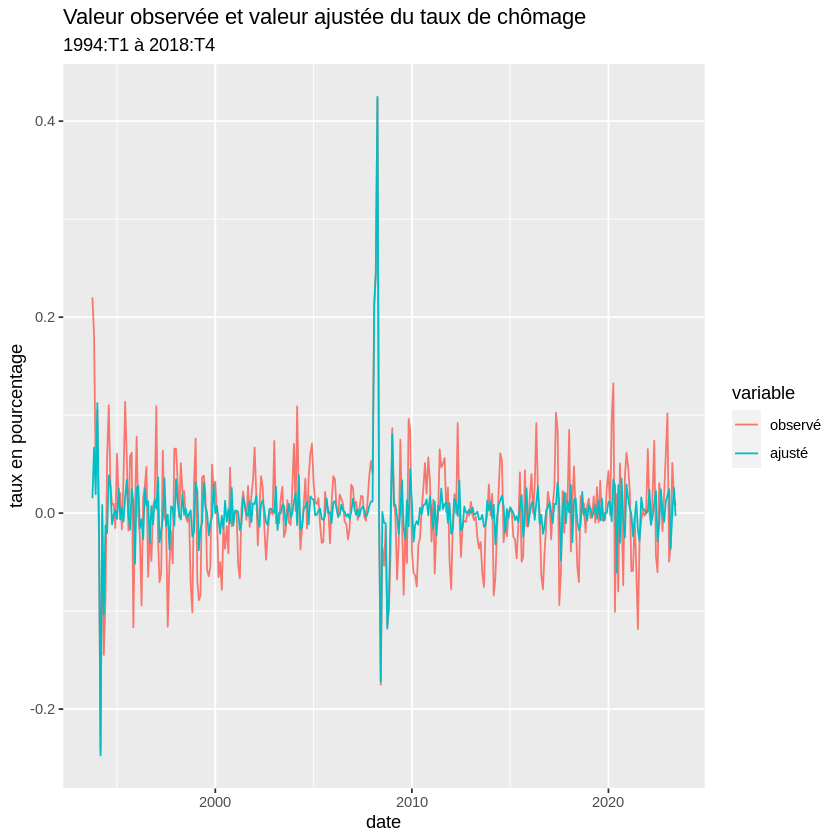

In [ ]:
library(ggplot2)
library(reshape2)

df_plot<-data.frame(df_taux_riz$dates[1:357],df_taux_riz$gR[1:357],F=as.matrix(ARMA_riz_dum_2$fitted))
colnames(df_plot)<-c("date","observé","ajusté")

data_melt=melt(as.data.frame(df_plot),id.vars = 1)

p_F_us<-ggplot(data=data_melt,aes(x=date))+geom_line(aes(x=date,y=value,color= variable))
p_F_us+labs(y="taux en pourcentage",title = "Valeur observée et valeur ajustée du taux de chômage",
            subtitle = "1994:T1 à 2018:T4")

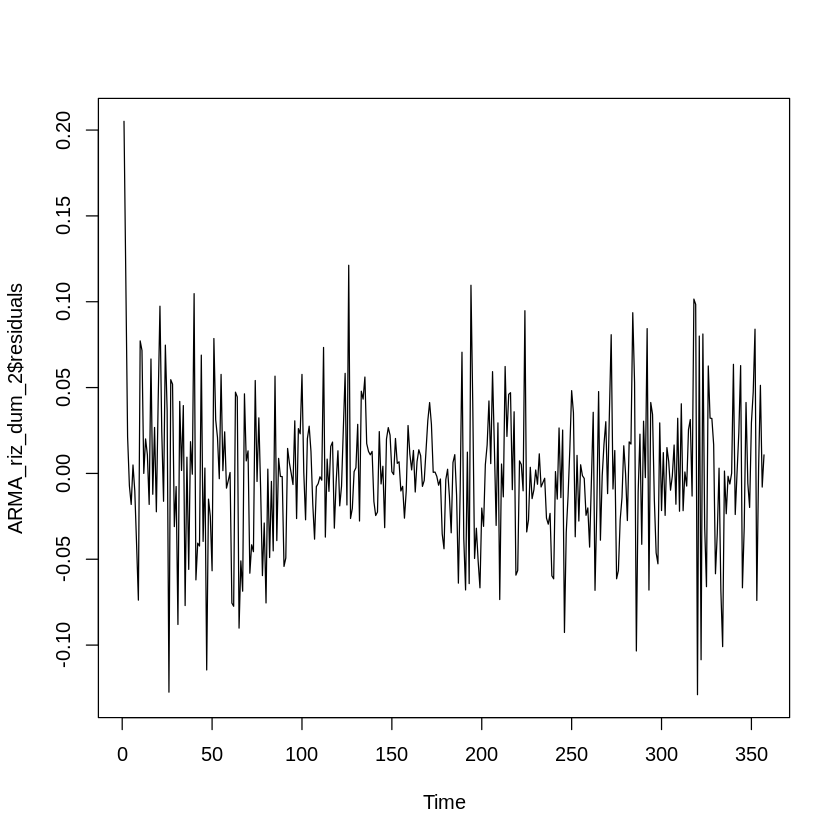

In [ ]:
plot(ARMA_riz_dum_2$residuals)

On réalise à nouveau à nouveau les tests de Jarque et Bera, ainsi que le test d'absence d'effet ARCH :

In [ ]:
sprintf("Skewness des residus : %f",skewness(ARMA_riz_dum_2$residuals))
sprintf("kurtosis des residus : %f",kurtosis(ARMA_riz_dum_2$residuals))
jarque.bera.test(ARMA_riz_dum_2$residuals)

[1] "Skewness des residus : 0.268007"

[1] "kurtosis des residus : 4.555195"


	Jarque Bera Test

data:  ARMA_riz_dum_2$residuals
X-squared = 40.251, df = 2, p-value = 1.818e-09


On observe que la prise en compte des variables indicatrices à permis d'améliorer les valeurs de notre skewness et kurtosis. Ainsi :    
- La série obtenue à un skewness très proche de 0, elle est donc beaucoup plus symétrique que les rendements modélisés par un ARMA(2,1)
- Nous avons réduit la kurtosis de moitié ce qui indique que les queues de distribution sont moins épaisses qu'avec notre précédent model.


In [ ]:
ArchTest(ARMA_riz_dum_2$residuals,lags=4)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  ARMA_riz_dum_2$residuals
Chi-squared = 21.562, df = 4, p-value = 0.000245


#$\color{red}{\text{Partie 2 : Modélisation multivariée}}$

Les modèles Arma fiter précédemment nous permettent de modéliser les informations apportés par une seule variable. Toutefois, pour être en mesure de mettre en place une stratégie de Pair Trading, il convient d'étudier l'interdépendance qu'il existe entre nos différentes variables.

A cette fin, nous allons mettre en place un modèle VAR pour analyser nos différentes variables simultanément. Le modèle VAR, composé à partir des processus stationnarisés nous permettra d'étudier les relations de causalité ainsi que les impacts d'un choc des autres variables sur une variable.

Ainsi, on crée un dataframe où l'on regroupe nos trois séries stationnarisées, le riz, le blé et le maïs :

In [65]:
df_g_short<-data.frame(df_taux_riz$dates,df_taux_riz$gR,df_taux_ble$gB,df_taux_mais$gM)
# on perd une observation en calculant le taux de croissance
colnames(df_g_short)<-c("date","g_riz","g_blé","g_mais")

On recherche tout d'abord le nombre de retards par l'application de critères d'informations multivariés.

In [66]:
library(vars)
pselect<-VARselect(y=df_g_short[,c(2,3,4)],lag.max=8,type=c("none"))
pselect$criteria # Affichage des valeurs des critère de sélection
pselect$selection # nombre de retards optimal selon les critères de sélection

Loading required package: MASS

Loading required package: strucchange

Loading required package: sandwich



,1,2,3,4,5,6,7,8
AIC(n),-1.740008e+01,-1.745485e+01,-1.742864e+01,-1.742991e+01,-1.745021e+01,-1.748400e+01,-1.748785e+01,-1.745413e+01
HQ(n),-1.736077e+01,-1.737622e+01,-1.731070e+01,-1.727266e+01,-1.725364e+01,-1.724812e+01,-1.721267e+01,-1.713964e+01
SC(n),-1.730130e+01,-1.725727e+01,-1.713228e+01,-1.703477e+01,-1.695627e+01,-1.689128e+01,-1.679635e+01,-1.666385e+01
FPE(n),2.774861e-08,2.627005e-08,2.696836e-08,2.693522e-08,2.639609e-08,2.552191e-08,2.542764e-08,2.630522e-08


AIC(n)  HQ(n)  SC(n) FPE(n) 
     7      2      1      7

D'après le critère d'informations multivariés "BIC", nous prenons un retard, cette décision est prise sur les mêmes principes que précédemment. Par conséquent, nous estimons un modèle VAR avec un retard.

#$\color{red}{\text{I)Estimation d'un VAR(1)}}$

*Remarque : On met le blé en premier car d'après les différents tests de Granger que l'on effectuera par la suite et la décomposition de Cholesky, on observera que c'est le blé qui cause le riz et non l'inverse. C'est donc le blé qui doit être placé en première position. Deplus, nous avons décider d'estimer un modèle VAR(1) seulement sur les séries du riz et du blé, car en incluant le maïs plus de la moitié des coefficients de régressions ne sont pas significatifs.*



In [67]:
var.lag <-VAR(y = df_g_short[,c("g_blé","g_riz")],type="none",lag.max = 1)
summary(var.lag) #Affichage des résultats avec summary


VAR Estimation Results:
Endogenous variables: g_blé, g_riz 
Deterministic variables: none 
Sample size: 359 
Log Likelihood: 1031.661 
Roots of the characteristic polynomial:
0.2858 0.2858
Call:
VAR(y = df_g_short[, c("g_blé", "g_riz")], type = "none", lag.max = 1)


Estimation results for equation g_blé: 
g_blé = g_blé.l1 + g_riz.l1 

         Estimate Std. Error t value Pr(>|t|)    
g_blé.l1  0.22228    0.05154   4.313 2.09e-05 ***
g_riz.l1 -0.04220    0.05720  -0.738    0.461    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.0629 on 357 degrees of freedom
Multiple R-Squared: 0.05102,	Adjusted R-squared: 0.0457 
F-statistic: 9.596 on 2 and 357 DF,  p-value: 8.722e-05 


Estimation results for equation g_riz: 
g_riz = g_blé.l1 + g_riz.l1 

         Estimate Std. Error t value Pr(>|t|)    
g_blé.l1  0.10908    0.04334   2.517   0.0123 *  
g_riz.l1  0.34672    0.04811   7.207 3.42e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 

 **Commentaires des résultats :**



*Résultats du riz :* Les deux coefficients des variables explicatives, à savoir le riz et le blé sont significatif au seuil de 1%. On remarque qu'ils sont positifs, c'est à dire qu'un hausse du cours de l'une de ces variables à la période t-1 entraîne une hausse du cours du riz à la date t. De plus, le R² est de 0,24.

 \\

*Résultats du blé :*  Le coefficient associé à la variable du riz est négatif et n'est pas signicatif au seuil de 5%. Il serait prudent de poser un coefficient égal à 0. Le R² est égale à 0.05, il est inférieur au résultat précédent. c'est à dire que les cours du riz et du blé à la période t-1 ne permettent d'expliquer que 5% du cours du blé à la période t.
Ce résultat nous permet de conclure que le cours du blé dépend d'une grande diversité de facteurs qui ne sont pas nécessairement inclus dans ce VAR.


\\

**Affichage des racines du polynôme caractéristique** :

Les séries sur lesquels nous portons notre étude sont stationnaires, par conséquent le VAR doit l'être également. La fonction roots renvoie les modules des inverses des racines du polynôme caractéristique.

On observe que les inverses des racines du polynôme sont effectivement dans le cercle unité, par conséquent notre modèle VAR(1) est stationnaire. \\

In [69]:
roots(var.lag)

[1] 0.2857812 0.2857812

La matrice des coefficients estimés du VAR est la suivante :

In [68]:
var_coef<-Acoef(var.lag)
var_coef

,g_blé.l1,g_riz.l1
g_blé,0.2222765,-0.04220478
g_riz,0.1090825,0.34671711


Au vu des coefficients de la matrice du modèle VAR(1), le cours du blé à la période t-1 affecte positivement le cours suivant. En effet le coefficient est de 0,22. La même observation s'effectue pour le cours du riz avec un coefficient de 0,34.
Toutefois, le cours du riz semble impacter négativement et très faiblement le blé avec un coefficient négatif de -0,042. L'effet inverse est observé en ce qui concerne l'impact du cours du blé sur celui du riz avec un coefficient de 0,11. Ces résultats ne paraissent pas cohérents avec l'eventuelle substituabilité qu'il peut exister entre ces deux céréales. Nous supposons donc que : soit le modèle VAR est incorrecte, ou alors les biens ne sont pas substituables. En effet, si le cours du riz augmente en t-1, alors celui du blé doit également augmenté en t dans le cadre de la substituabilité. Nous aurons l'occasion de vérifier cela à partir des fonctions d'impulsion réponse et du test de cointégration de Johansen.



#$\color{red}{\text{II)Test de causalité au sens de Granger}}$

Désormais, nous cherchons à vérifier l’existence de relations de causalité entre le blé et le riz. A priori, on peut s'attendre à ce que le blé cause positivement au sens de granger le riz, et non l'inverse en raison de la non significativité du coefficient $a_{1,2}$ au seuil de 5%.

\\

- Nous testons d'abord un test de causalité au sens de Granger sur le riz :

**$\underline{\text{Hypothèses}}$** : $\left\{\begin{array}{c}H_0: a_{1,2} = 0 => le~riz~ne~cause~ pas~le~blé
\\H_1:a_{1,2} > 0 => le~riz~cause~le~blé\end{array}\right.$

**$\underline{\text{Statistique de test}}$** : $F\_stat = \frac{SCR^C - SCR^{NC}}{SCR^{NC}}  \frac{T - 2p}{p}$

**$\underline{\text{Règle de décision}}$** : Rejet de $H_0$ au seuil $\alpha$ si F est supérieur au seuil critique.

\\

Les résultats valident nos attentes, le riz ne cause pas le blé au sens de Granger. En effet, on ne rejette pas $H_0$ au seuil de 5% car la probabilité critique est inférieur à 5% et la $F$-$Test$ = 0.46 est inférieur au seuil critique.


In [71]:
causality(var.lag,cause=c('g_riz'))

$Granger

	Granger causality H0: g_riz do not Granger-cause g_blé

data:  VAR object var.lag
F-Test = 0.5444, df1 = 1, df2 = 714, p-value = 0.4609


$Instant

	H0: No instantaneous causality between: g_riz and g_blé

data:  VAR object var.lag
Chi-squared = 0.31381, df = 1, p-value = 0.5754



 - On fait un test de causalité au sens de Granger sur le blé :


**$\underline{\text{Hypothèses}}$** : $\left\{\begin{array}{c}H_0: a_{2,1} = 0 => le~blé~ne~cause~pas~le~riz
\\H_1:a_{2,1} > 0 => le~blé~cause~le~riz\end{array}\right.$

**$\underline{\text{Statistique de test}}$** : $F\_stat = \frac{SCR^C - SCR^{NC}}{SCR^{NC}}  \frac{T - 2p}{p}$

**$\underline{\text{Règle de décision}}$** : Rejet de $H_0$ au seuil $\alpha$ si F est supérieur au seuil critique.

\\

 On rejette $H_0$ au seuil de 5% car la probabilité critique est inférieur à 5%. On conclut que le blé cause le riz au sens de Granger.

In [72]:
causality(var.lag,cause=c('g_blé'))

$Granger

	Granger causality H0: g_blé do not Granger-cause g_riz

data:  VAR object var.lag
F-Test = 6.3342, df1 = 1, df2 = 714, p-value = 0.01206


$Instant

	H0: No instantaneous causality between: g_blé and g_riz

data:  VAR object var.lag
Chi-squared = 0.31381, df = 1, p-value = 0.5754



**Conclusion sur les causalités :**

Nous concluons que seule la variable blé impacte la variable riz et qu'il n'y a donc pas d'effet *feed back*. Nous pouvons supposer que le coefficients $a_{1,2}$ de la matrice de notre modèle VAR est nul.

#$\color{red}{\text{III)Fonction d'impulsion réponse}}$

Les fonctions d'impulsions réponses permettent d'étudier l'effet de propagation d'un choc d'une variable sur les autres variables avec lesquelles elle partagent un lien d'interdépendance. Nous allons les utiliser pour renforcer notre conclusion sur les tests précédents et obtenir une double prespective sur l'interdépendance qu'il existe entre le riz et le blé sur différents horizons.

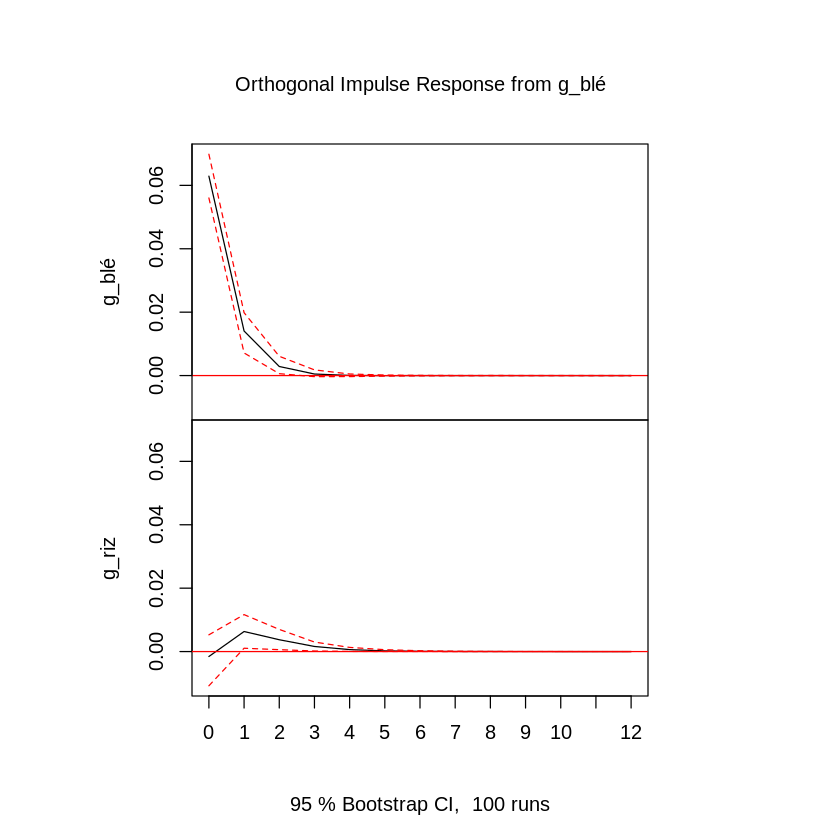

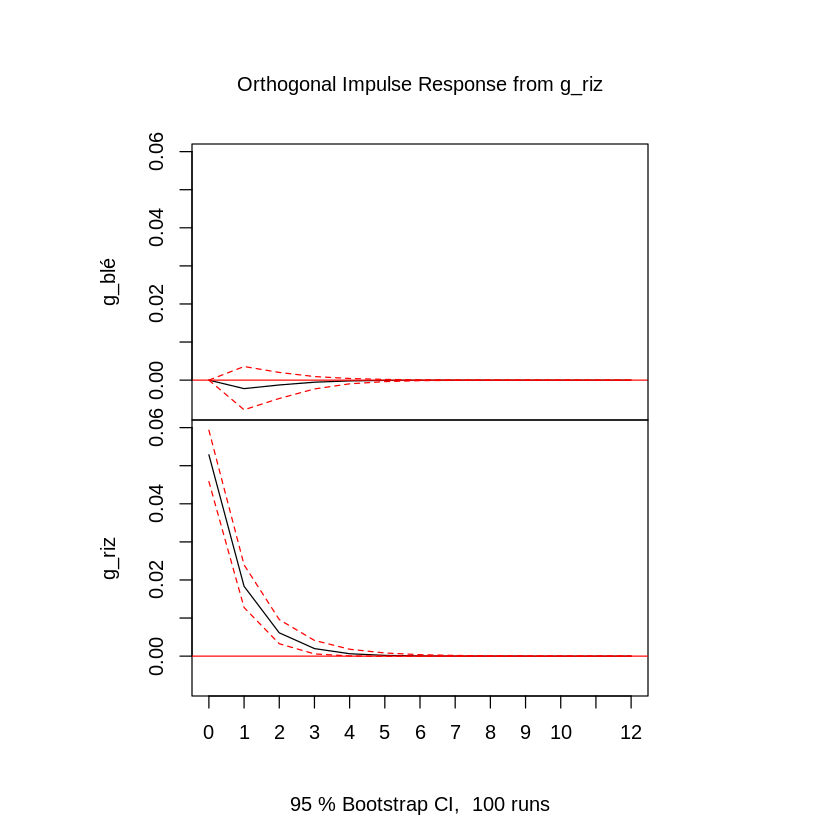

In [73]:
#On calcule les fonctions impulsion réponse :

#var.lag : objet
#n.ahead : nombre de périodes futures pour lesquelles on calcule les impulsion réponse
#ortho = TRUE : on applique la décomposition de Cholesky
#ci = 0.95 : on représente les bornes de l'intervalle de confiance à 95 % pour déterminer la significativité des IRF.

irf<-irf(var.lag,n.ahead = 12,ortho = TRUE,ci=0.95)
plot(irf)



*   *Effet d'un choc sur g_riz :* Les FIR semblent confirmer les conclusions obtenues à partir du test de causalité de Granger, un choc sur le riz n'a pas d'impact significatif sur le prix du blé, du moins avec un seuil d'erreur de 5%.

*   *Effet d'un choc sur g_blé :* A terme, l'impact sur le cours du riz est positif mais il n'est pas instantané, ce résultat est cohérent avec le fait que le blé et le riz sont tout deux des biens substituables et nous conforte dans l'idée qu'il est possible que ces deux séries soient cointégrées. De plus, nous notons que le choc n'affecte le riz que sur le court terme, et qu'il se résorbe entrièrement sur le moyen terme, à partir du 6$^{éme}$ mois.



**Estimation des FIR par les projections locales.**

On estime les FIR par la méthode des projections locales. On spécifie les paramètres suivants :

Nous choisissons 12 horizons, chaque horizon correspond à un mois d'intervalle. De plus, le nombre de retards dans la régression de la projection locale sera au plus égal à 8 et sera automatiquement selectionner par la minimisation du critère BIC pour chaque horizon. Enfin, on applique des chocs égaux à 1 écart type du choc structurel.

[[1]]
NULL


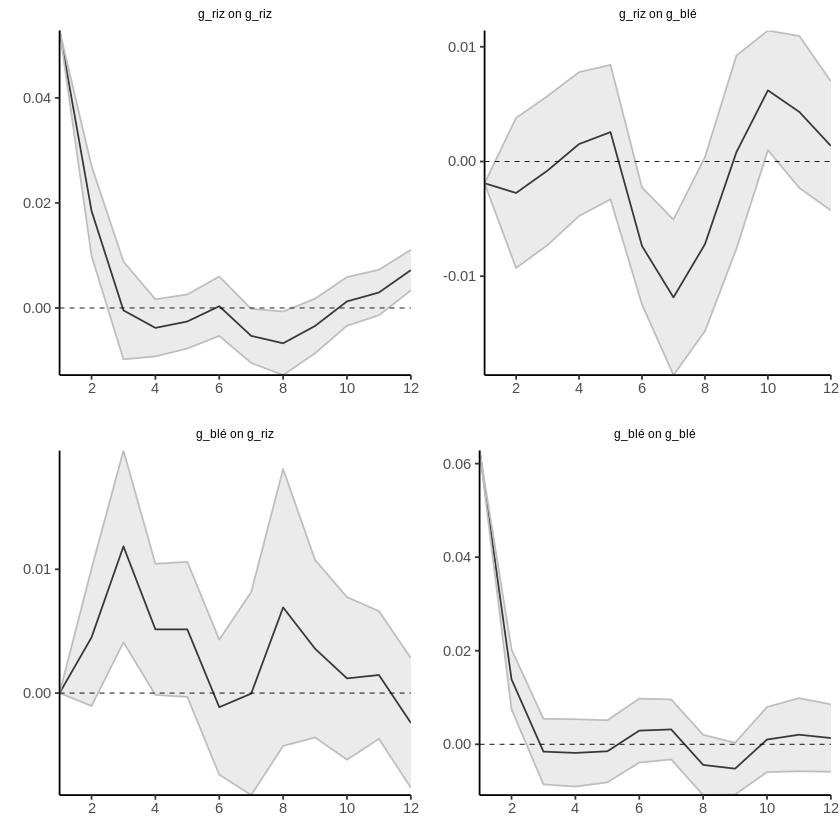

In [74]:

library(lpirfs)
irf_LP <-lp_lin(endog_data = df_g_short[, c(2, 3)],
                    lags_endog_lin = NaN,
                    lags_criterion = 'BIC',
                    max_lags = 8,
                    trend = 0,
                    shock_type = 0,
                    confint=1.96,
                    hor=12,
                    adjust_se=TRUE)

plot(irf_LP)

**Commentaires :**

- Un choc sur les rendements du riz : implique un léger impact négatif et non significatif sur le cours blé. Une hausse du cours du riz engendre une légère baisse non immédiate du cours du blé, qui se résorbe assez rapidement d'après la première fonction d'impulsion réponse.

- Un choc sur les rendements du blé : implique un impact plus conséquent sur le cours du riz de manière non instantanée. La méthode des projections locales confirme de nouveaux les résultats obtenus à partir de la fonction obtenu à partir du VAR(1).


**Conclusion :** Les résultats obtenus par les fonctions d'impulsion réponse donnent des résultats cohérents à ceux trouvés précédemment à partir des coefficients de la matrice du modèle var(1) ou des tests de causalité au sens de Grager. Le cours du riz n'impacte pas significativement celui du blé et une hausse du cours du blé implique une hausse du cours du riz sur le court terme. Les différences obtenues sur les graphiques des deux méthodes peuvent être expliquées par le fait que les projections locales sont estimées en déterminant de façon endogène le nombre de retards pour chaque horizon.

Toutefois, il convient de nuancer cette conclusion. En effet, l'impact des chocs sur les variables ne se résorbe pas à partir du 6$^{éme}$ mois et est encore présent au bout d'un an. Ainsi, par précaution, nous préférons considérer que le modèle VAR(1) ne traduit pas correctement les relations d'interdependances de nos variables et n'est donc pas le meilleur modèle. En effet, dans la partie univariée nous avons fiter un ARMA, il pourrait donc être plus convenable de fiter un VARMA pour traduire les relations d'interdependances entre les variables, ou bien un VECM dans le cas où il existe entre une et n-1 relations de cointégration indépendantes. De plus, les cours du blé, du riz ou du maïs dépendent de multiples facteurs, énumérés précédemment, qui rend potentiellement incomplet notre modèle. Par conséquent, nous ne ferons pas de prévisions à partir de celui-ci.


#$\color{red}{\text{IV)Cointégration}}$
La cointégration est une notion qui signifie qu'il existe une relation de long terme entre plusieurs variables intégrés d'ordre 1 tel que il y'a au moins une fonction linéaire de ces variables qui soit intégrés d'ordre 0 : $I(0)$. On parle de relation de cointégration.


La cointégration est un phénomène qui a lieu sur les marchés financiers pour les produits substituables. Le coeur de notre projet vise à déterminer si les series du prix du blé, du riz et du maïs, qui sont toutes des céréales, sont cointégrés et permettent de mettre en place une stratégie de Paires Trading.

\\

Ainsi, pour effectuer un test de cointégration de Johanesen, nous devons disposer de séries $I(1)$. D'après les test adf que nous avons précedemment effectués, les séries du cours du blé, du riz et du maïs sont DS et intégrés d'ordre 1 sans constante ni dérive. C'est pourquoi on peut tester une cointégration entre les trois séries.
On utiliste nos séries en log-linéariser, car elle donnent plus de relief aux petites valeurs, elles sont donc mieux manipulables.

\\

# **Test de cointégration de Johansen**


L'étape préliminaire consiste à déterminer le nombre de retards pour le test de cointégration.
On cherche donc le nombre de retards optimal pour un modèle VAR des variables blé, riz et maïs en minimisant des critères d'information multivariés. On fixe à 12 le nombre de retards maximum et l'on inclut une constante dans chaque équation du VAR. On définit un dataframe contenant uniquement les variables pour lesquelles on teste l'existence de la cointégration.

Du fait que nous avons estimer le modèle VAR à partir du blé et du riz seulement, il semble raisonnable de tester la cointégration de Johansen entre ces deux variables. Toutefois, nous allons également effectuer le test entre les trois varaibles pour compléter notre étude.

In [ ]:
correlation <- cor(df_riz_log$riz,df_ble_log$ble)
print(paste("Corrélation entre le taux de chômage et la production de pétrole :", round(correlation, 4)))

[1] "Corrélation entre le taux de chômage et la production de pétrole : 0.7633"


In [ ]:

library(dplyr)
join_df_riz_ble<-right_join(df_riz_log,df_ble_log)
join_df <-right_join(join_df_riz_ble,df_mais_log)

#str(join_df_riz_ble)
#tail(join_df_riz_ble)


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Joining with `by = join_by(dates)`
Joining with `by = join_by(dates)`


In [ ]:
#Etape préliminaire : détermination du nombre de retards pour le test de cointégration
#On cherche le nombre de retards optimal pour un modèle VAR des variables blé et riz en minimisant des critères d'information multivariés. On fixe à 12 le nombre de retards maximum et l'on inclut une constante dans chaque équation du VAR. On définit un dataframe contenant uniquement les variables pour lesquelles on teste l'existence de la cointégration


# on définit un dataframe qui contient les variables pour lesquelles on teste l'existence de la cointégration
df_riz_ble2<- join_df_riz_ble[,c('riz','ble')] # on définit un dataframe qui contient les variables pour lesquelles on teste l'existence de la cointégration
pselect<-VARselect(y=df_riz_ble2,lag.max=12,type=c("const"))
#pselect<-VARselect(y=join_df,lag.max=12,type=c("const"))

# Affichage des valeurs des critère de sélection
#pselect$criteria
# nombre de retards optimal selon les critères de sélection
pselect$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     3      2      2      3

En se basant sur le critère d'information BIC, on choisit de prende deux retards.

##$\color{red}{\text{1) Test de la trace :}}$
Un premier test consite à déterminer le nombre de relations de cointégrations $r$  linéairement indépendantes qu'il existes, c'est à dire le rang de la matrice Π. Ce test est nommé *test de la trace*.

- si $r = 0$ => les séries ne sont pas cointégrés.
- si $r = n$ => autant de relations de cointégrations que de composantes de $X_t$. Deplus, $X_t$ est stationnaire.
- si $0< r < n$ => il existe r relations de cointégrations linéairement indépendantes.

Le test est le suivant :

**$\underline{\text{Hypothèses}}$** :  $\left\{\begin{array}{c}H_0: rang(Π) <= r\\H_1:rang(Π) > r \end{array}\right.$


**$\underline{\text{Statistique de test}}$** : $Q(r) = -T{∑_{i=r+1}^n ln(1-\lambda_i)}$


**$\underline{\text{Règle de décision}}$** :  Si $Q$ est supérieur au seuil critique, alors on rejette $H_0$.

\\

On effectue le test de la trace de manière répétés en partant de r = 0, jusqu'à la répétion qui ne rejette pas l'hypothèse nulle au seuil de $α$%.

In [ ]:
# test de la trace


riz_ble.vecm<-ca.jo(df_riz_ble2,ecdet = "const",spec = "transitory",type = 'trace',K=2)
summary(riz_ble.vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 5.948806e-02 8.848742e-03 4.038896e-19

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  3.19  7.52  9.24 12.97
r = 0  | 25.21 17.85 19.96 24.60

Eigenvectors, normalised to first column:
(These are the cointegration relations)

             riz.l1      ble.l1   constant
riz.l1    1.0000000   1.0000000  1.0000000
ble.l1   -1.0073818   0.8745669  0.3653793
constant -0.5432876 -10.7642147 -6.6712749

Weights W:
(This is the loading matrix)

           riz.l1       ble.l1      constant
riz.d -0.05069039 -0.001835767 -1.642264e-16
ble.d  0.01767125 -0.008209215  7.871856e-17



Le premier test est effectué avec les hypothèses suivantes :
       

**Hypothèses** :  $\left\{\begin{array}{c}H_0: r = rang(Π) <= 0\\H_1:r = rang(Π) > 0 \end{array}\right.$


La statistique du test de la trace est : $Q = 25,21$. \\
Le seuil de rejet pour un risque de première espèce de 5% est égal à 19.96 \\
Donc on rejette l'hypothèse nulle au seuil de 5% car  $Q$ = 25,21 > 19.96

Ce premier test nous permet de conclure qu'il y'a au moins une relation de cointégrations.

\\

On effectue un second test pour r = 1 :

**Hypothèses** :  $\left\{\begin{array}{c}H_0: r = rang(Π) <= 1\\H_1:r = rang(Π) > 1 \end{array}\right.$

La statistique du test de la trace est : $ Q=3,19  < 19.96$


*Conclusion* : On ne rejette pas l'hypothèse nulle au seuil de 5%, il existe une unique relation de cointégration linéairement indépendante entre le cours du riz et du blé.

##$\color{red}{\text{2) Test de la valeur propore maximale :}}$

On effectue un second test, à savoir le test de la valeur propre maximale pour confirmer les résultats obtenus avec le test de la trace.


**Hypothèses** :  $\left\{\begin{array}{c}H_0: rang(Π) \leq r\\H_1:rang(Π) \leq r  + 1 \end{array}\right.$

**Statistique de test :**  $Q_{max}(r|r+1) = -T~ln(1-λ_{r+1})$

**Règle de décision :**  Si $Q_{max}(r|r+1)$ est supérieur au seuil critique, alors on rejette $H_0$.

\\

In [ ]:
# test de la valeur propre maximale


riz_ble.vecm_eigen<-ca.jo(df_riz_ble2,ecdet = "const",spec = "transitory",type = 'eigen',K=2)
summary(riz_ble.vecm_eigen)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 5.948806e-02 8.848742e-03 4.038896e-19

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  3.19  7.52  9.24 12.97
r = 0  | 22.02 13.75 15.67 20.20

Eigenvectors, normalised to first column:
(These are the cointegration relations)

             riz.l1      ble.l1   constant
riz.l1    1.0000000   1.0000000  1.0000000
ble.l1   -1.0073818   0.8745669  0.3653793
constant -0.5432876 -10.7642147 -6.6712749

Weights W:
(This is the loading matrix)

           riz.l1       ble.l1      constant
riz.d -0.05069039 -0.001835767 -1.642264e-16
ble.d  0.01767125 -0.008209215  7.871856e-17


* Pour $r \leq 0$, on rejette l'hypothèse nulle au seuil de 5%. En effet, $Q_{max}(0|1)$ = 22,02 > 15,67.
* Pour $r \leq 1$, on ne rejette pas l'hypothèse nulle au seuil de 5%. En effet, $Q_{max}(1|0)$ = 3,19 < 9,24.


Le test de la valeur propre maximale confirme nos résultats, à savoir qu'il existe une relation de cointégration entre le cours du riz et du blé.

##$\color{red}{\text{3) VECM :}}$

On conclut à l'existence d'une relation de cointégration entre cours du riz et du blé. On estime le modèle VECM en imposant une relation de cointégration.

In [ ]:
# estimation du VECM :

estim_vecm<-cajorls(riz_ble.vecm,r=1)
summary(estim_vecm$rlm)

Response riz.d :

Call:
lm(formula = riz.d ~ ect1 + riz.dl1 + ble.dl1 - 1, data = data.mat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21428 -0.02771 -0.00228  0.02740  0.32264 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
ect1    -0.05069    0.01107  -4.579 6.47e-06 ***
riz.dl1  0.34242    0.04682   7.313 1.74e-12 ***
ble.dl1  0.05968    0.04354   1.371    0.171    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05148 on 356 degrees of freedom
Multiple R-squared:  0.1877,	Adjusted R-squared:  0.1808 
F-statistic: 27.41 on 3 and 356 DF,  p-value: 5.679e-16


Response ble.d :

Call:
lm(formula = ble.d ~ ect1 + riz.dl1 + ble.dl1 - 1, data = data.mat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.198303 -0.035304 -0.003387  0.038484  0.241637 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
ect1     0.01767    0.01351   1.308    0.192    
riz.dl1 -0.04071    0.05716  -0

On a les deux équations du VECM :


- **Equation du riz :** \\
Le coefficient de l'écart à la relation de cointégration décalé d'un retard *$ect1$* est négatif et significatif à 1%. La relation de cointégration a donc un effet sur la dynamique  du riz.
Le signe négatif correspond au signe attendu : quand *$ect1>0$*, le prix du riz est supérieur à sa valeur de long terme. Le mécanisme à correction d'erreur a tendance à le ramener vers sa valeur de long terme en diminuant le prix. Seul le prix du riz en $t-1$ est significatif.




- **Equation du blé :** \\
le coefficient de l'écart à la relation de cointégration décalé d'un retard (ect1) est positif et non significatif au seuil de 5%. Seul le cours du blé en $t-1$ est significatif.

On remarque par ailleurs que les coefficients du cours du riz par rapport au cours du blé et du cours du blé par rapport au cours du riz ne sont pas significaitfs. Cela signifie simplement que les variables ne sont pas liées sur le court temre mais n'empêche pas la cointégration et la fait qu'elles aient une même tendance de long terme.

Pour un obtenir un aperçu de la relation de cointégration qu'il existe entre les variables, on untilise la fonction plot :

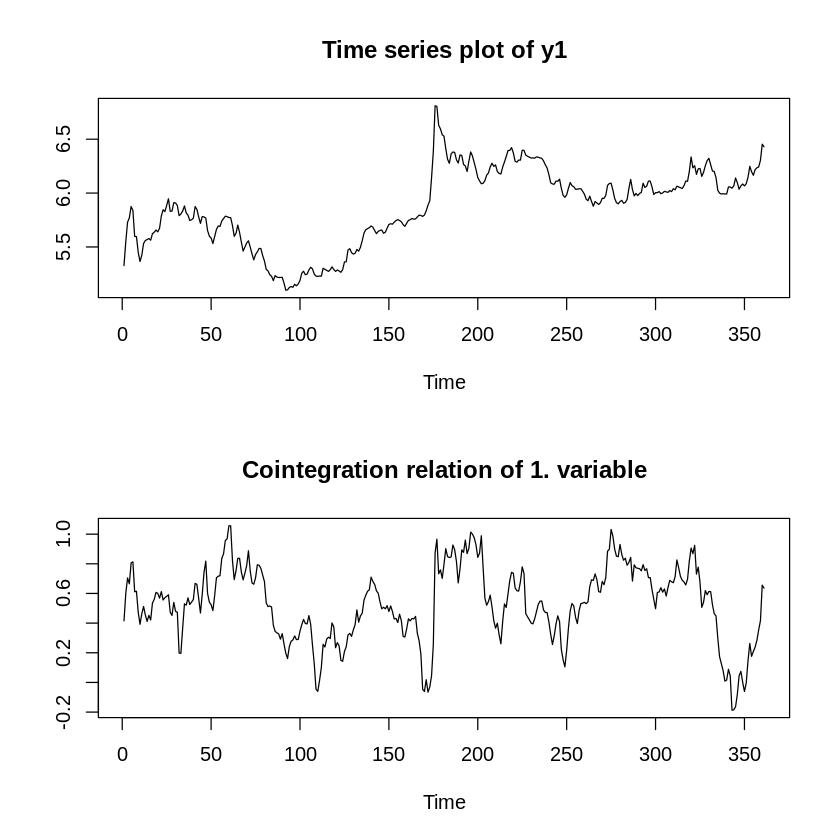

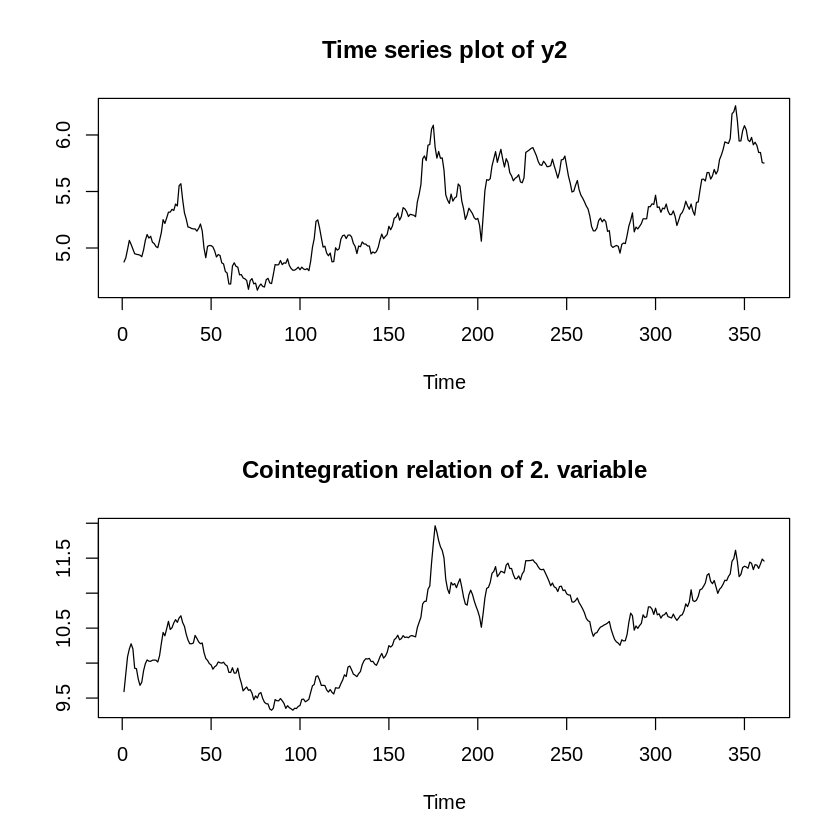

In [ ]:
# On peut représenter les variables ainsi que la relation de cointégration avec la fonction plot.


plot(riz_ble.vecm)

Les résidus du VECM et leurs uatocorrélogrammes sont les suivants :

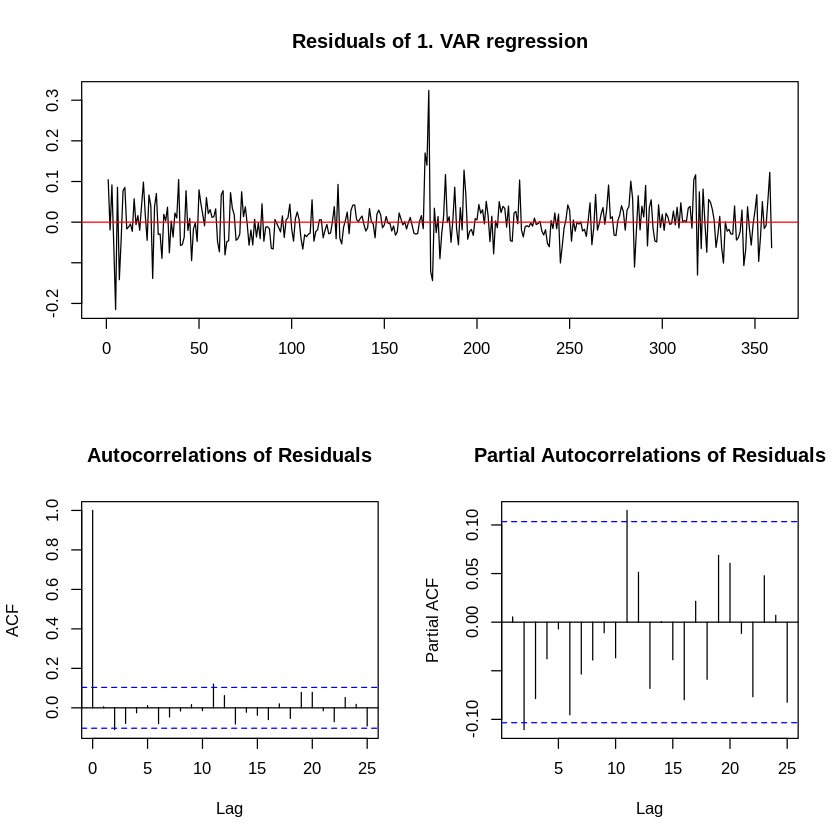

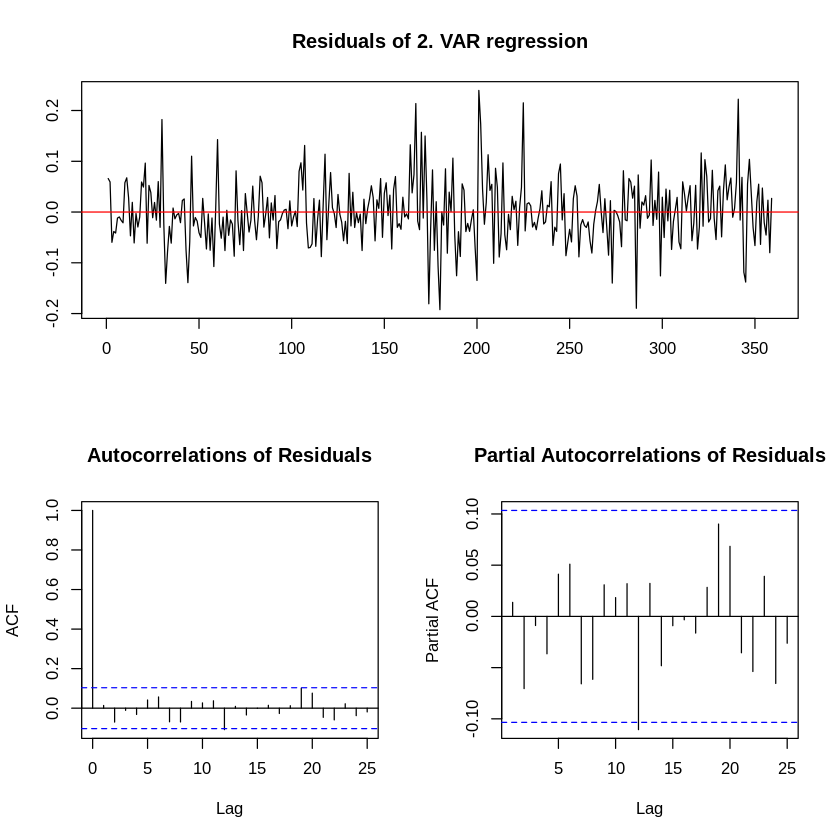

In [ ]:
plotres(riz_ble.vecm)

#$\color{red}{\text{Conclusion}}$

Dans le cadre de ce projet, nous avons avons travaillé sur les prix mensuels de trois céréales, et tout particulièrement du riz. Nous avons déterminé le modèle ARMA adapté et montré les limites de ce dernier : la non prise en compte de la grande volatilité de notre série, qui doit être modélisée par un GARCH. La prise en compte des autres variables nous a permis d'étudier les relations entre ces différents biens, notamment la cointégration. Nous pouvons conclure de la partie multivariée qu'un modèle VAR n'est pas adapté et que nos séries sont bien cointégrées : la mise en oeuvre d'une stratégie de pair trading sur le blé et le riz est donc possible, même si pour mesurer pleinement son impact, il aurait été plus judicieux de sélectionner des données quotidiennes sur les cours des futures.

#$\color{red}{\text{Annexe}}$


In [ ]:
arma_test <- auto.arima(df_riz_log$riz)
arma_test

Series: df_riz_log$riz 
ARIMA(2,1,0) 

Coefficients:
         ar1      ar2
      0.4054  -0.1397
s.e.  0.0529   0.0541

sigma^2 = 0.002905:  log likelihood = 541.57
AIC=-1077.13   AICc=-1077.06   BIC=-1065.47

In [ ]:
ARMA_riz_4 <- Arima(y=  df_taux_riz$gR[1:357], order = c(2,0,0))
summary(ARMA_riz_4)
coeftest(ARMA_riz_4)

Series: df_taux_riz$gR[1:357] 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1      ar2    mean
      0.4065  -0.1386  0.0027
s.e.  0.0530   0.0537  0.0039

sigma^2 = 0.002862:  log likelihood = 540.17
AIC=-1072.35   AICc=-1072.23   BIC=-1056.84

Training set error measures:
                        ME       RMSE        MAE MPE MAPE      MASE        ACF1
Training set -0.0001123028 0.05327569 0.03681833 NaN  Inf 0.8138204 -0.01400953


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1        0.4065056  0.0529727  7.6739 1.669e-14 ***
ar2       -0.1386250  0.0536769 -2.5826  0.009806 ** 
intercept  0.0026869  0.0038509  0.6977  0.485340    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


D'après auto-arima, le meilleur modèle théoriqur dans la famille ARMA est l'AR(2). Nous avons cependant privilégier un ARMA(2,1) car, graphiquement avec les PACF et les ACF, la partie MA avec un 1 retard semblait significative. En outre, l'ensemble des coefficients du modèle ARMA(2,1), sauf la constante, étaient significatifs. En outre, les tests d'effet ARCH sur les résidus, et les prévisions, ont montré que le meilleur modèle est un GARCH car le modèle ARMA ne prend pas en compte la volatilité de la série. Autrement dit, les valeurs prédites par l'ARMA ont beaucoup moins d'amplitude que la réalité. C'est pourquoi, on estime un GARCH.

##$\color{red}{\text{Etude sans la crise des subprimes}}$

Nous savons que nos séries ont été affectées par plusieurs évènements majeurs, notamment la crise des subprimes. Cette période est de loin celle où les prix se sont le plus envolés. On s'interroge donc sur la possibilité d'améliorer notre modèle en excluant cette période.

On considère que la crise des subprimes s'est étendue de décembre 2007 à juin 2009 en s'appuyant sur les données du site NBER. On construit ainsi une variable indicatrice pour tenir compte de chacun de ces mois :

In [ ]:
df_taux_riz$DUM9401 <- as.numeric(df_taux_riz$dates=="1994-01-01")
df_taux_riz$DUM9402 <- as.numeric(df_taux_riz$dates=="1994-02-01")
df_taux_riz$DUM9403 <- as.numeric(df_taux_riz$dates=="1994-03-01")
df_taux_riz$DUM9404 <- as.numeric(df_taux_riz$dates=="1994-04-01")
df_taux_riz$DUM9405 <- as.numeric(df_taux_riz$dates=="1994-05-01")
df_taux_riz$DUM9406 <- as.numeric(df_taux_riz$dates=="1994-06-01")
df_taux_riz$DUM0712 <- as.numeric(df_taux_riz$dates=="2007-12-01")
df_taux_riz$DUM0801 <- as.numeric(df_taux_riz$dates=="2008-01-01")
df_taux_riz$DUM0802 <- as.numeric(df_taux_riz$dates=="2008-02-01")
df_taux_riz$DUM0803 <- as.numeric(df_taux_riz$dates=="2008-03-01")
df_taux_riz$DUM0804 <- as.numeric(df_taux_riz$dates=="2008-04-01")
df_taux_riz$DUM0805 <- as.numeric(df_taux_riz$dates=="2008-05-01")
df_taux_riz$DUM0806 <- as.numeric(df_taux_riz$dates=="2008-06-01")
df_taux_riz$DUM0807 <- as.numeric(df_taux_riz$dates=="2008-07-01")
df_taux_riz$DUM0808 <- as.numeric(df_taux_riz$dates=="2008-08-01")
df_taux_riz$DUM0809 <- as.numeric(df_taux_riz$dates=="2008-09-01")
df_taux_riz$DUM0810 <- as.numeric(df_taux_riz$dates=="2008-10-01")
df_taux_riz$DUM0811 <- as.numeric(df_taux_riz$dates=="2008-11-01")
df_taux_riz$DUM0812 <- as.numeric(df_taux_riz$dates=="2008-12-01")
df_taux_riz$DUM0901 <- as.numeric(df_taux_riz$dates=="2009-01-01")
df_taux_riz$DUM0902 <- as.numeric(df_taux_riz$dates=="2009-02-01")
df_taux_riz$DUM0903 <- as.numeric(df_taux_riz$dates=="2009-03-01")
df_taux_riz$DUM0904 <- as.numeric(df_taux_riz$dates=="2009-04-01")
df_taux_riz$DUM0905 <- as.numeric(df_taux_riz$dates=="2009-05-01")
df_taux_riz$DUM0906 <- as.numeric(df_taux_riz$dates=="2009-06-01")
yreg <- c("DUM9401","DUM9402","DUM9403", "DUM9404", "DUM9405", "DUM0712",
"DUM0801","DUM0802", "DUM0803","DUM0804","DUM0805","DUM0806","DUM0807","DUM0808",
"DUM0809","DUM0810",  "DUM0811",
"DUM0812","DUM0901","DUM0902","DUM0903","DUM0904","DUM0905","DUM0906")
head(df_taux_riz)

In [ ]:
#df_taux_riz_full$DUM9401 <- as.numeric(df_taux_riz_full$dates=="1994-01-01")
#df_taux_riz_full$DUM9402 <- as.numeric(df_taux_riz_full$dates=="1994-02-01")
#df_taux_riz_full$DUM9403 <- as.numeric(df_taux_riz_full$dates=="1994-03-01")
#df_taux_riz_full$DUM0803 <- as.numeric(df_taux_riz_full$dates=="2008-03-01")
#df_taux_riz_full$DUM0804 <- as.numeric(df_taux_riz_full$dates=="2008-04-01")
#df_taux_riz_full$DUM0805 <- as.numeric(df_taux_riz_full$dates=="2008-05-01")
#df_taux_riz_full$DUM0806 <- as.numeric(df_taux_riz_full$dates=="2008-06-01")
#df_taux_riz_full$DUM0807 <- as.numeric(df_taux_riz_full$dates=="2008-07-01")
#df_taux_riz_full$DUM0808 <- as.numeric(df_taux_riz_full$dates=="2008-08-01")
#df_taux_riz_full$DUM0809 <- as.numeric(df_taux_riz_full$dates=="2008-09-01")
#df_taux_riz_full$DUM0810 <- as.numeric(df_taux_riz_full$dates=="2008-10-01")
#zreg <- c("DUM9401","DUM9402","DUM9403","DUM0803","DUM0804","DUM0805","DUM0806","DUM0807","DUM0808", "DUM0809",
"DUM0810")

On estime ensuite notre modèle ARMA(2,1) en enlevant ces périodes :

In [ ]:
ARMA_riz_dum <- Arima(y=df_taux_riz$gR[1:357], order = c(2,0,1),xreg=as.matrix(df_taux_riz[1:357, yreg]))
summary(ARMA_riz_dum)
coeftest(ARMA_riz_dum)

On observe que les coefficients associés aux retards 1 et 2 de la partie AR, ainsi que le coefficient associé à la partie MA, sont toujours significatifs. En outre, on constate que seuls les variables indicatrices associées aux mois de février, mars, avril et juin 2008 sont significatives au seuil de 0,1%, celles d'octobre et novembre sont significatives au seuil de 5% et celle de janvier 2009 est significative au seuil de 5%.

On essaye d'estimer un nouveau modèle uniquement avec ses variables indicatrices :

In [ ]:
zreg <- c("DUM9401","DUM9403","DUM9405","DUM0802","DUM0803","DUM0804","DUM0806","DUM0810","DUM0811","DUM0901")
ARMA_riz_dum_2 <- Arima(y=df_taux_riz$gR[1:357], order = c(2,0,0),xreg=as.matrix(df_taux_riz[1:357, zreg]))
summary(ARMA_riz_dum_2)
coeftest(ARMA_riz_dum_2)

L'ensemble des facteurs retenus dans ce modèle sont significatifs, à l'exception de la constante. En outre, on observe que les critères d'information sont plus faibles pour ce modèle que pour le modèle avec l'ensemble des indicatrices retenues.

On vérifie les propriétés de ce modèle ARMA(2,1) avec 6 indicatrices.

In [ ]:
library(ggplot2)
library(reshape2)

df_plot<-data.frame(df_taux_riz$dates[1:357],df_taux_riz$gR[1:357],F=as.matrix(ARMA_riz_dum_2$fitted))
colnames(df_plot)<-c("date","observé","ajusté")

data_melt=melt(as.data.frame(df_plot),id.vars = 1)

p_F_us<-ggplot(data=data_melt,aes(x=date))+geom_line(aes(x=date,y=value,color= variable))
p_F_us+labs(y="taux en pourcentage",title = "Valeur observée et valeur ajustée du taux de chômage",
            subtitle = "1994:T1 à 2018:T4")

In [ ]:
plot(ARMA_riz_dum_2$residuals)

On réalise à nouveau à nouveau les tests de Jarque et Bera, ainsi que le test d'absence d'effet ARCH :

In [ ]:
sprintf("Skewness des residus : %f",skewness(ARMA_riz_dum_2$residuals))
sprintf("kurtosis des residus : %f",kurtosis(ARMA_riz_dum_2$residuals))
jarque.bera.test(ARMA_riz_dum_2$residuals)

On observe que la prise en compte des variables indicatrices à permis d'améliorer les valeurs de notre skewness et kurtosis. Ainsi :    
- La série obtenue à un skewness très proche de 0, elle est donc beaucoup plus symétrique que les rendements modélisés par un ARMA(2,1)
- Nous avons réduit la kurtosis de moitié ce qui indique que les queues de distribution sont moins épaisses qu'avec notre précédent model.

In [ ]:
ArchTest(ARMA_riz_dum_2$residuals,lags=4)

La probabilité critique du test d'absence d'effet ARCH est de 0,000245 < 5% donc on rejette l'hypothèse nulle.

On conclut que malgré la prise en compte des variables indicatrices significatives, avec près de 25 variables dummyes retenues à l'origine, on ne parvient pas à corriger l'effet ARCH et la non normalité de nos résidus. Une piste pour obtenir un modèle vérifiant l'ensemble des critères pour les résidus et de modéliser un modèle GARCH.


##$\color{red}{\text{ Modèle GARCH}}$

Afin de corriger cet effet ARCH, on peut chercher à estimer un modèle GARCH afin d'améliorer nos prévisions, autrement ces dernières auront une amplitude moindre que ce qui est observé empiriquement. On tente ainsi d'estimer le modèle GARCH correspondant :

In [ ]:
#install.packages("rugarch")
library(rugarch)
garch_test <- garch(df_taux_riz$gR, grad="numerical",trace=FALSE)
print(summary(garch_test))
#garch_riz <- garch(df_taux_riz$gR, order=c(1,1))
#print(summary(garch_riz))


Call:
garch(x = df_taux_riz$gR, grad = "numerical", trace = FALSE)

Model:
GARCH(1,1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9613 -0.4540  0.0000  0.5618  4.6404 

Coefficient(s):
    Estimate  Std. Error  t value Pr(>|t|)    
a0 0.0004254   0.0001094    3.887 0.000101 ***
a1 0.3068570   0.0597762    5.133 2.85e-07 ***
b1 0.5581553   0.0666382    8.376  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Diagnostic Tests:
	Jarque Bera Test

data:  Residuals
X-squared = 40.217, df = 2, p-value = 1.849e-09


	Box-Ljung test

data:  Squared.Residuals
X-squared = 0.66496, df = 1, p-value = 0.4148



In [ ]:
garch_riz <- ugarchspec(variance.model = list(garchorder=c(1,1)), mean.model = list(arimaorder=c(2,0,1)))
garch_riz_fit <- ugarchfit(garch_riz, data=df_taux_riz$gR)
garch_riz_fit

Warning message:
“unidentified option(s) in mean.model:
 arimaorder”
Warning message:
“unidentified option(s) in variance.model:
 garchorder”



*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,1)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001320    0.002953  0.44706 0.654834
ar1     0.059178    0.138815  0.42631 0.669881
ma1     0.274764    0.128838  2.13262 0.032956
omega   0.000385    0.000132  2.91140 0.003598
alpha1  0.256566    0.068573  3.74150 0.000183
beta1   0.597561    0.083114  7.18962 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.001320    0.002695  0.48981 0.624270
ar1     0.059178    0.100580  0.58837 0.556285
ma1     0.274764    0.089333  3.07574 0.002100
omega   0.000385    0.000222  1.73104 0.083445
alpha1  0.256566    0.093803  2.73517 0.006235
beta1   0.597561    0.122099  4.89406 0.000001

LogLike

In [ ]:
garch_riz_forecast <- ugarchforecast(garch_riz_fit, n.ahead = 3)
garch_riz_forecast


*------------------------------------*
*       GARCH Model Forecast         *
*------------------------------------*
Model: sGARCH
Horizon: 3
Roll Steps: 0
Out of Sample: 0

0-roll forecast [T0=1970-12-27]:
       Series   Sigma
T+1 -0.019177 0.07183
T+2  0.000107 0.06923
T+3  0.001248 0.06692



Les valeurs estimées par le GARCH sont donc :
$prix\_riz_{t+1} = e^{(ln(prix\_riz_t) + rdt\_riz_t)}$

Le rendement estimé est donné par le modèle (-0,019177 pour h = 1), d'où :

$prix\_riz_{202307} = e^{6,242223 - 0,019177} ≈ 504,34$


$prix\_riz_{202308} = e^{(ln(504,34) + 0,00011)} = e^{6,2233 - 0,00011} ≈ 504,4$


$prix\_riz_{202309} = e^{(ln(504,4) + 0,00125)} = e^{6,2234 + 0,00125} ≈ 505,03$

Il est sans doute nécessaire de tenir compte du Sigma pour améliorer la prévision.

##$\color{red}{\text{Test de conintégration de Johansen à 3 variables}}$

On effectue désormais un test de cointégration de Johansen à partir des trois variables : prix du riz, prix du blé, prix du maïs.

On reprend la démarche que dans le test sur les deux variables : prix du riz, prix du blé.

C'est à dire que l'on détermine dans un premier temps le nombre de retards optimal pour le test de cointégration. Ensuite, on execute le test de la trace ainsi que le test de la valeur propre maximale pour obtenir le nombre de relations de cointégrations indépendante qu'il existe. Enfin, s'il existe au moins un relation, on recherche un VECM.

On obtient que le nombre optimal de retards est de deux, et qu'il existe deux relations de cointégrations indépendantes au seuil de 1%. C'est pourquoi on effectue un VECM.
Les *$ect1$* liées au maïs et au riz sont positifs et significatifs au seuil de 5%. L'*$~ect1$* du blé et négatif et non significatif. Les résultats liés à la significativité du blé et du riz sont les mêmes que précédemment, toutefois les signes sont opposés. Cela est dût à l'ajout de la variable du prix du maïs.

Les données numériques sur lesquelles on se base pour tirer ces conclusions sont les suivantes.

In [ ]:
df_all<- join_df[,c('riz','ble','mais')] # on définit un dataframe qui contient les variables pour lesquelles on teste l'existence de la cointégration
pselect<-VARselect(y=df_all,lag.max=12,type=c("const"))

pselect$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     8      2      2      8

In [ ]:
# test de la trace

all.vecm<-ca.jo(df_all,ecdet = "const",spec = "transitory",type = 'trace',K=2)
summary(all.vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1]  8.529024e-02  5.176528e-02  8.597552e-03 -4.984697e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  3.10  7.52  9.24 12.97
r <= 1 | 22.18 17.85 19.96 24.60
r = 0  | 54.19 32.00 34.91 41.07

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            riz.l1     ble.l1     mais.l1   constant
riz.l1     1.00000  1.0000000   1.0000000  1.0000000
ble.l1    19.36806 -0.1227655   0.7398678  0.2204905
mais.l1  -18.26702 -0.7740128   0.6804832  0.3478632
constant -16.52233 -1.3333495 -13.5636968 -7.4746886

Weights W:
(This is the loading matrix)

             riz.l1      ble.l1      mais.l1      constant
riz.d   0.003120058 -0.04786064 -0.001294804  3.504970e-16
ble.d  -0.001697295  0.01180918 -0.006066900 -3.561647e-17
mais.d 

In [ ]:
# test de la valeur propre maximale


all.vecm_eigen<-ca.jo(df_all,ecdet = "const",spec = "transitory",type = 'eigen',K=2)
summary(all.vecm_eigen)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1]  8.529024e-02  5.176528e-02  8.597552e-03 -4.984697e-18

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 2 |  3.10  7.52  9.24 12.97
r <= 1 | 19.08 13.75 15.67 20.20
r = 0  | 32.00 19.77 22.00 26.81

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            riz.l1     ble.l1     mais.l1   constant
riz.l1     1.00000  1.0000000   1.0000000  1.0000000
ble.l1    19.36806 -0.1227655   0.7398678  0.2204905
mais.l1  -18.26702 -0.7740128   0.6804832  0.3478632
constant -16.52233 -1.3333495 -13.5636968 -7.4746886

Weights W:
(This is the loading matrix)

             riz.l1      ble.l1      mais.l1      constant
riz.d   0.003120058 -0.04786064 -0.001294804  3.504970e-16
ble.d  -0.001697295  0.01180918 -0.00606

In [ ]:
# estimation du VECM :


estim2_vecm<-cajorls(all.vecm,r=1)
summary(estim2_vecm$rlm)

Response riz.d :

Call:
lm(formula = riz.d ~ ect1 + riz.dl1 + ble.dl1 + mais.dl1 - 1, 
    data = data.mat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.22130 -0.02601 -0.00045  0.02603  0.31595 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
ect1     0.003120   0.001081   2.885  0.00415 ** 
riz.dl1  0.310849   0.049144   6.325 7.61e-10 ***
ble.dl1  0.045215   0.051782   0.873  0.38316    
mais.dl1 0.069056   0.053010   1.303  0.19352    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05237 on 355 degrees of freedom
Multiple R-squared:  0.1615,	Adjusted R-squared:  0.1521 
F-statistic:  17.1 on 4 and 355 DF,  p-value: 7.783e-13


Response ble.d :

Call:
lm(formula = ble.d ~ ect1 + riz.dl1 + ble.dl1 + mais.dl1 - 1, 
    data = data.mat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.192235 -0.033240 -0.003349  0.037050  0.242538 

Coefficients:
          Estimate Std. Error t value Pr(>|

#$\color{red}{\text{Bibliographie : }}$

https://www.strategie-bourse.com/analyse-cours-ble.html

https://www.nber.org/research/data/us-business-cycle-expansions-and-contractions

https://research-repository.griffith.edu.au/bitstream/handle/10072/31962/62388_1.pdf?sequence=1

https://fr.wikipedia.org/wiki/Loi_du_prix_unique

https://wholesale.banking.societegenerale.com/fr/lexique-financier/matieres-premieres-commodities/

https://ro.uow.edu.au/cgi/viewcontent.cgi?referer=&httpsredir=1&article=4452&context=theses

https://www.fao.org/economic/est/publications/publications-sur-le-riz/fr/